In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
merged_glee_WC_comparison_df = pd.read_pickle("merged_glee_WC_comparison_df_full_v1.pkl")


In [3]:
merged_glee_WC_comparison_df.columns

Index(['data_or_pred', 'run', 'subrun', 'event', 'category', 'WC_file',
       'match_isFC', 'kine_reco_Enu', 'reco_showerKE', 'nc_delta_score',
       'WC_reco_num_protons', 'WC_reco_num_other_tracks', 'reco_nuvtxX',
       'reco_nuvtxY', 'reco_nuvtxZ', 'truth_vtxX', 'truth_vtxY', 'truth_vtxZ',
       'truth_nuEnergy', 'net_weight', 'entry', 'reco_shower_energy_plane0',
       'reco_shower_energy_plane1', 'reco_shower_energy_plane2',
       'reco_shower_energy_max', 'reco_vertex_x', 'reco_vertex_y',
       'reco_vertex_z', 'mctruth_nu_vertex_x', 'mctruth_nu_vertex_y',
       'mctruth_nu_vertex_z', 'mctruth_nu_E', 'simple_pot_weight', 'glee_file',
       'glee_selection'],
      dtype='object')

In [4]:
# from Mark slack message 06/21/21
#merged_glee_WC_comparison_df["reco_shower_energy_plane2_corrected"] = merged_glee_WC_comparison_df["reco_shower_energy_plane2"].to_numpy() * 1.21 + 9.88

# from Mark slack message 08/017/22

plane_2_energies = merged_glee_WC_comparison_df["reco_shower_energy_plane2"].to_numpy()
max_energies = merged_glee_WC_comparison_df["reco_shower_energy_max"].to_numpy()

corrected_energies = []
for i in tqdm(range(len(plane_2_energies))):
    corrected_energies.append(
        ((plane_2_energies[i] + max_energies[i] * (plane_2_energies[i]==0))*1.21989 + 8.50486)
    )

merged_glee_WC_comparison_df["reco_shower_energy_corrected"] = corrected_energies


100%|███████████████████████████| 10510536/10510536 [00:20<00:00, 512959.45it/s]


In [5]:
print(merged_glee_WC_comparison_df["reco_shower_energy_plane2"])

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
               ...    
10510531    164.402147
10510532    266.836514
10510533    186.856392
10510534    146.504544
10510535    480.185831
Name: reco_shower_energy_plane2, Length: 10510536, dtype: float64


In [6]:
print(merged_glee_WC_comparison_df["reco_shower_energy_corrected"])

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
               ...    
10510531    209.057395
10510532    334.016055
10510533    236.449105
10510534    187.224288
10510535    594.278754
Name: reco_shower_energy_corrected, Length: 10510536, dtype: float64


In [7]:
# from Mark slack message 08/017/22
merged_glee_WC_comparison_df["fixed_glee_pot_weight"] = merged_glee_WC_comparison_df["simple_pot_weight"].to_numpy() * 6.803e+20/4.081e+19


In [8]:
num_glee = merged_glee_WC_comparison_df.query("glee_file=='NCDeltaRadOverlaySM'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='NCDeltaRadOverlaySM' and WC_file==WC_file").shape[0]
print("fraction of glee NCDeltaRadOverlaySM events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_NCDeltaRadOverlaySM = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='NCPi0Coh'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='NCPi0Coh' and WC_file==WC_file").shape[0]
print("fraction of glee NCPi0Coh events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_NCPi0Coh = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='NCPi0NotCoh'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='NCPi0NotCoh' and WC_file==WC_file").shape[0]
print("fraction of glee NCPi0NotCoh events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_NCPi0NotCoh = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='CC1Pi0'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='CC1Pi0' and WC_file==WC_file").shape[0]
print("fraction of glee CC1Pi0 events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_CC1Pi0 = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='NueOverlays'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='NueOverlays' and WC_file==WC_file").shape[0]
print("fraction of glee NueOverlays events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_NueOverlays = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='OTPCExtra'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='OTPCExtra' and WC_file==WC_file").shape[0]
print("fraction of glee OTPCExtra events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_OTPCExtra = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='BNBOtherExtra'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='BNBOtherExtra' and WC_file==WC_file").shape[0]
print("fraction of glee BNBOtherExtra events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_BNBOtherExtra = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='Dirt'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='Dirt' and WC_file==WC_file").shape[0]
print("fraction of glee Dirt events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_Dirt = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='BNBext'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='BNBext' and WC_file==WC_file").shape[0]
print("fraction of glee BNBext events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_BNBext = num_glee_in_wc / num_glee

num_glee = merged_glee_WC_comparison_df.query("glee_file=='data'").shape[0]
num_glee_in_wc = merged_glee_WC_comparison_df.query("glee_file=='data' and WC_file==WC_file").shape[0]
print("fraction of glee data events in WC files:", num_glee_in_wc, "/", num_glee, "=", num_glee_in_wc / num_glee)
ratio_data = num_glee_in_wc / num_glee



fraction of glee NCDeltaRadOverlaySM events in WC files: 3101 / 4115 = 0.7535844471445929
fraction of glee NCPi0Coh events in WC files: 34 / 62 = 0.5483870967741935
fraction of glee NCPi0NotCoh events in WC files: 281 / 657 = 0.4277016742770167
fraction of glee CC1Pi0 events in WC files: 104 / 203 = 0.5123152709359606
fraction of glee NueOverlays events in WC files: 175 / 325 = 0.5384615384615384
fraction of glee OTPCExtra events in WC files: 40 / 98 = 0.40816326530612246
fraction of glee BNBOtherExtra events in WC files: 36 / 60 = 0.6
fraction of glee Dirt events in WC files: 6 / 15 = 0.4
fraction of glee BNBext events in WC files: 10 / 11 = 0.9090909090909091
fraction of glee data events in WC files: 159 / 170 = 0.9352941176470588


In [9]:
overlap_weights = []

glee_files = merged_glee_WC_comparison_df["glee_file"].to_numpy()

for glee_file in glee_files:
    if glee_file == "NCDeltaRadOverlaySM":
        overlap_weights.append(ratio_data / ratio_NCDeltaRadOverlaySM)
    elif glee_file == "NCPi0Coh":
        overlap_weights.append(ratio_data / ratio_NCPi0Coh)
    elif glee_file == "NCPi0NotCoh":
        overlap_weights.append(ratio_data / ratio_NCPi0NotCoh)
    elif glee_file == "CC1Pi0":
        overlap_weights.append(ratio_data / ratio_CC1Pi0)
    elif glee_file == "NueOverlays":
        overlap_weights.append(ratio_data / ratio_NueOverlays)
    elif glee_file == "OTPCExtra":
        overlap_weights.append(ratio_data / ratio_OTPCExtra)
    elif glee_file == "BNBOtherExtra":
        overlap_weights.append(ratio_data / ratio_BNBOtherExtra)
    elif glee_file == "Dirt":
        overlap_weights.append(ratio_data / ratio_Dirt)
    elif glee_file == "BNBext":
        overlap_weights.append(ratio_data / ratio_BNBext)
    else:
        overlap_weights.append(-1) # this should be used for data and events out of the glee files, won't end up being used

merged_glee_WC_comparison_df["overlap_weights"] = overlap_weights

merged_glee_WC_comparison_df["fixed_glee_pot_weight_corrected"] = merged_glee_WC_comparison_df["fixed_glee_pot_weight"] * merged_glee_WC_comparison_df["overlap_weights"]



In [10]:
print(ratio_data * 6.803e+20) # effective POT of overlap

6.362805882352941e+20


In [11]:
gLEE_categories = ["NCDelta", "NCPi0Coh", "NCPi0NotCoh", "CC1Pi0", "BNBOther", "Nue", "OTPC", "Dirt", "BNBext"]

gLEE_queries = [
    f"glee_file == 'NCDeltaRadOverlaySM'",
    f"glee_file == 'NCPi0Coh'",
    f"glee_file == 'NCPi0NotCoh'",
    f"glee_file == 'CC1Pi0'",
    f"glee_file == 'BNBOtherExtra'",
    f"glee_file == 'NueOverlays'",
    f"glee_file == 'OTPCExtra'",
    f"glee_file == 'Dirt'",
    f"glee_file == 'BNBext'",
]

gLEE_colors = [
    "yellow",
    "salmon",
    "tomato",
    "royalblue",
    "skyblue",
    "orchid",
    "cyan",
    "brown",
    "limegreen",
]

In [12]:
wc_categories = ["NC Delta Radiative", "NC 1 Pi0", "numuCC 1 Pi0", "nueCC", "numuCC other", 
                 "NC other", "outFV", "badmatch/cosmic", "dirt", "ext", ]

wc_queries = [
    f"category == '{wc_categories[0]}'",
    f"category == '{wc_categories[1]}'",
    f"category == '{wc_categories[2]}'",
    f"category == '{wc_categories[3]}'",
    f"category == '{wc_categories[4]}'",
    f"category == '{wc_categories[5]}'",
    f"category == '{wc_categories[6]}'",
    f"category == '{wc_categories[7]}'",
    f"category == '{wc_categories[8]}'",
    f"category == '{wc_categories[9]}'",
]

wc_colors = [
    "yellow",
    "tomato",
    "royalblue",
    "orchid",
    "orange",
    "pink",
    "cyan",
    "turquoise",
    "brown",
    "limegreen",
]

In [13]:
print("   WC cats:   | NCDelta|NC 1 Pi0|CC 1 Pi0|  nueCC |CC other|NC other|  outFV |badmatch|  dirt  |  ext")
print("gLEE categories: ")


for i in range(len(gLEE_queries)):
    print("\n")
    print(str(gLEE_categories[i]).rjust(13), end = " | ")
    counts = []
    for j in range(len(wc_queries)):
        counts.append(merged_glee_WC_comparison_df.query(gLEE_queries[i] + " and " + wc_queries[j]).shape[0])
    #counts = np.array(counts) / np.sum(counts)
    for count in counts:
        print(str(round(count, 3)).rjust(7) + "|", end=" ")



   WC cats:   | NCDelta|NC 1 Pi0|CC 1 Pi0|  nueCC |CC other|NC other|  outFV |badmatch|  dirt  |  ext
gLEE categories: 


      NCDelta |    2918|       0|       0|       0|       0|       0|      26|     153|       0|       4| 

     NCPi0Coh |       0|      34|       0|       0|       0|       0|       0|       0|       0|       0| 

  NCPi0NotCoh |       0|     259|       0|       0|       0|       0|       5|      15|       0|       2| 

       CC1Pi0 |       0|       0|       0|       0|       0|       0|       0|       0|     104|       0| 

     BNBOther |       0|       0|       0|       0|      22|       9|       1|       4|       0|       0| 

          Nue |       0|       0|       0|     169|       0|       0|       0|       6|       0|       0| 

         OTPC |       0|       0|       0|       0|       1|       1|      30|       7|       0|       1| 

         Dirt |       0|       0|       0|       0|       0|       0|       0|       0|       6|       0| 

       BNBext 

In [33]:
merged_glee_WC_comparison_df.query("category=='dirt' and glee_file == 'CC1Pi0'")[
    ["run", "subrun", "event", 
     "WC_file", "glee_file", "glee_selection",
     "mctruth_nu_vertex_x", "mctruth_nu_vertex_y","mctruth_nu_vertex_z","mctruth_nu_E",]]



,run,subrun,event,WC_file,glee_file,glee_selection,mctruth_nu_vertex_x,mctruth_nu_vertex_y,mctruth_nu_vertex_z,mctruth_nu_E
79006,14436,229,11462,dirt_run3,CC1Pi0,1g0p,256.444202,10.491324,889.347302,1.359827
309252,7051,68,3443,dirt_run1,CC1Pi0,1g0p,23.482481,-113.791052,497.760532,2.758254
820756,17560,78,3942,dirt_run3,CC1Pi0,1g0p,63.664212,98.056506,878.495164,0.683732
932227,14802,132,6611,dirt_run3,CC1Pi0,1g0p,194.438800,-15.020874,192.442138,0.889192
1212879,16743,78,3922,dirt_run3,CC1Pi0,1g0p,90.562127,86.230332,347.757816,1.114333
...,...,...,...,...,...,...,...,...,...,...
10109695,7019,465,23292,dirt_run1,CC1Pi0,1g0p,171.075836,60.161440,810.685493,1.216065
10208341,18794,344,17218,dirt_run3,CC1Pi0,1g0p,214.632138,-3.368363,428.134705,0.693137
10273619,15267,181,9063,dirt_run3,CC1Pi0,1g0p,209.566691,46.025449,937.116704,0.589288
10305215,18955,256,12846,dirt_run3,CC1Pi0,1g0p,160.237534,-55.563325,142.570822,1.675895


In [15]:
# making non-generic selected events have nc delta score -20

nc_delta_scores = []
energies = merged_glee_WC_comparison_df["kine_reco_Enu"].to_numpy()
nc_delta_initial_scores = merged_glee_WC_comparison_df["nc_delta_score"].to_numpy()
for i in tqdm(range(merged_glee_WC_comparison_df.shape[0])):
    energy = energies[i]
    nc_delta_score = nc_delta_initial_scores[i]
    
    if energy < 0:# or np.isnan(energy):
        nc_delta_scores.append(-20.)
    else:
        nc_delta_scores.append(nc_delta_score)
merged_glee_WC_comparison_df["nc_delta_score"] = nc_delta_scores

100%|███████████████████████████| 10510536/10510536 [00:15<00:00, 676302.29it/s]


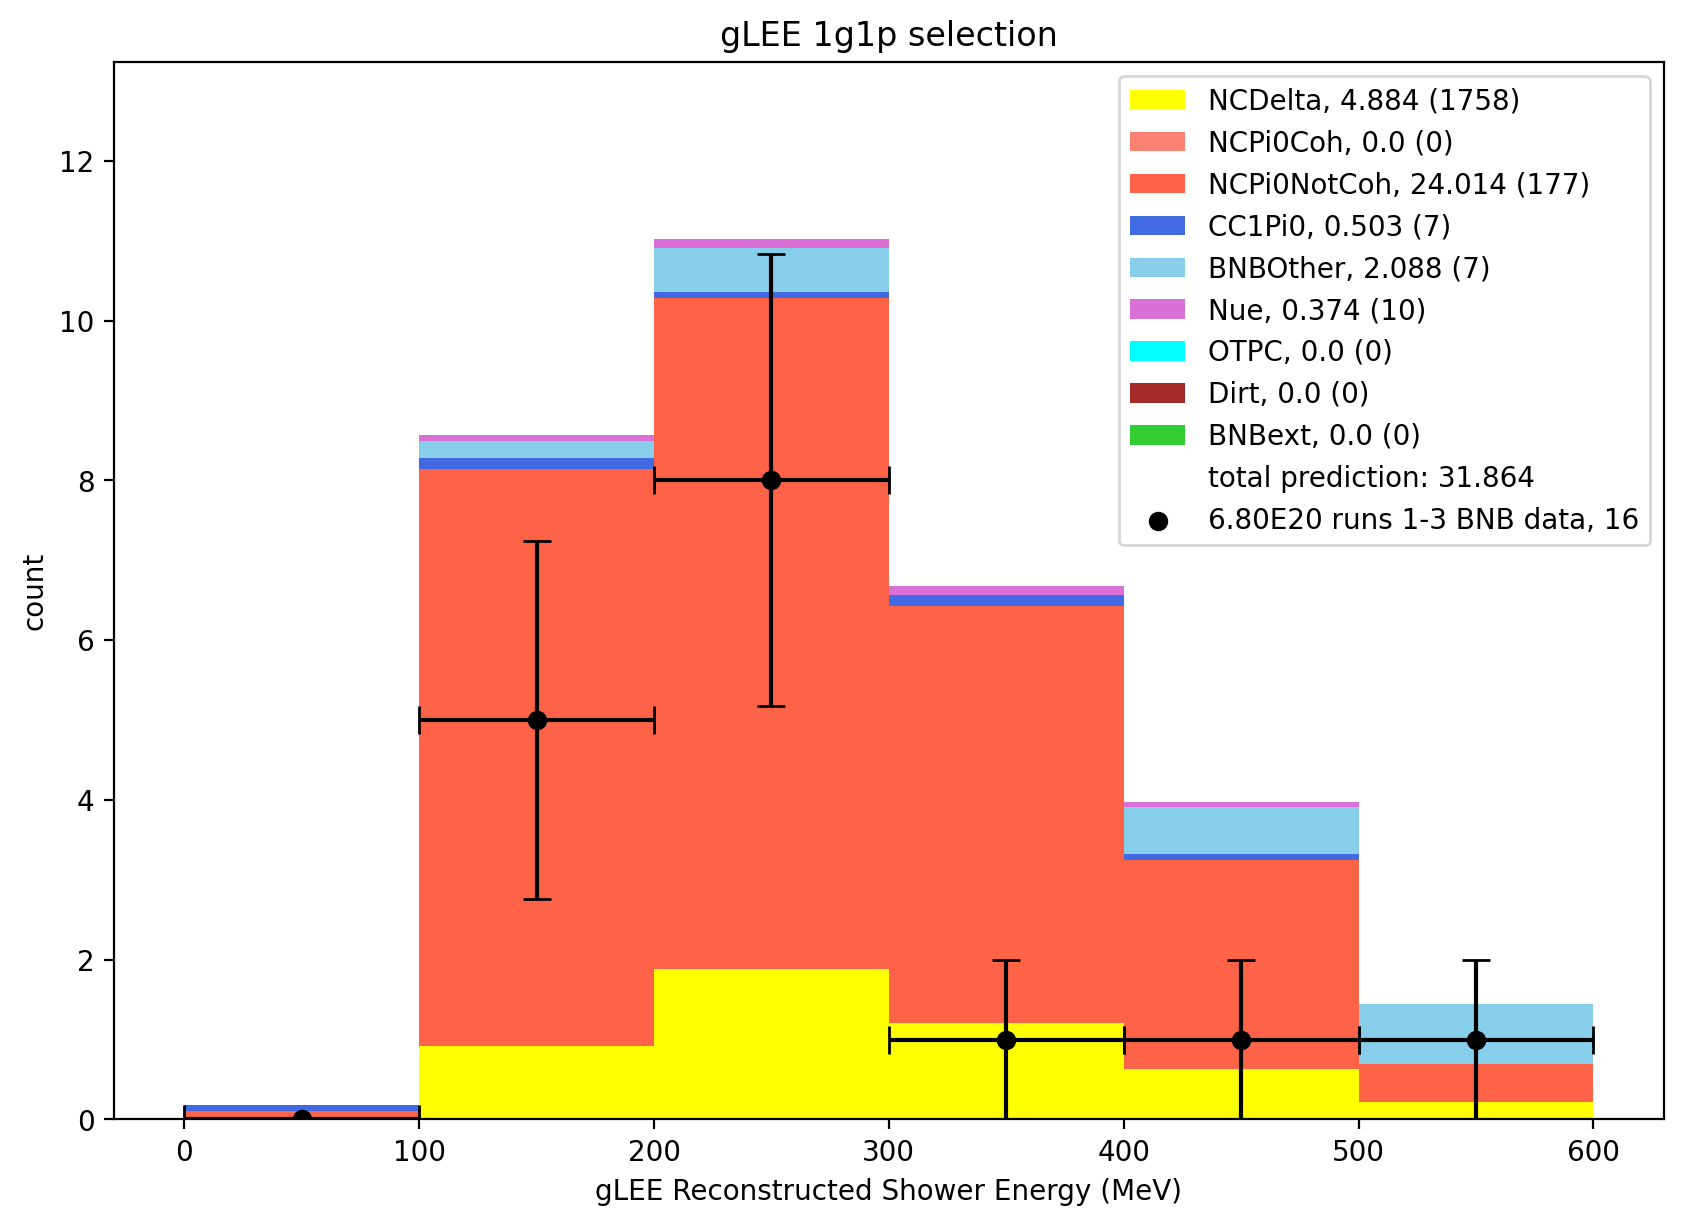

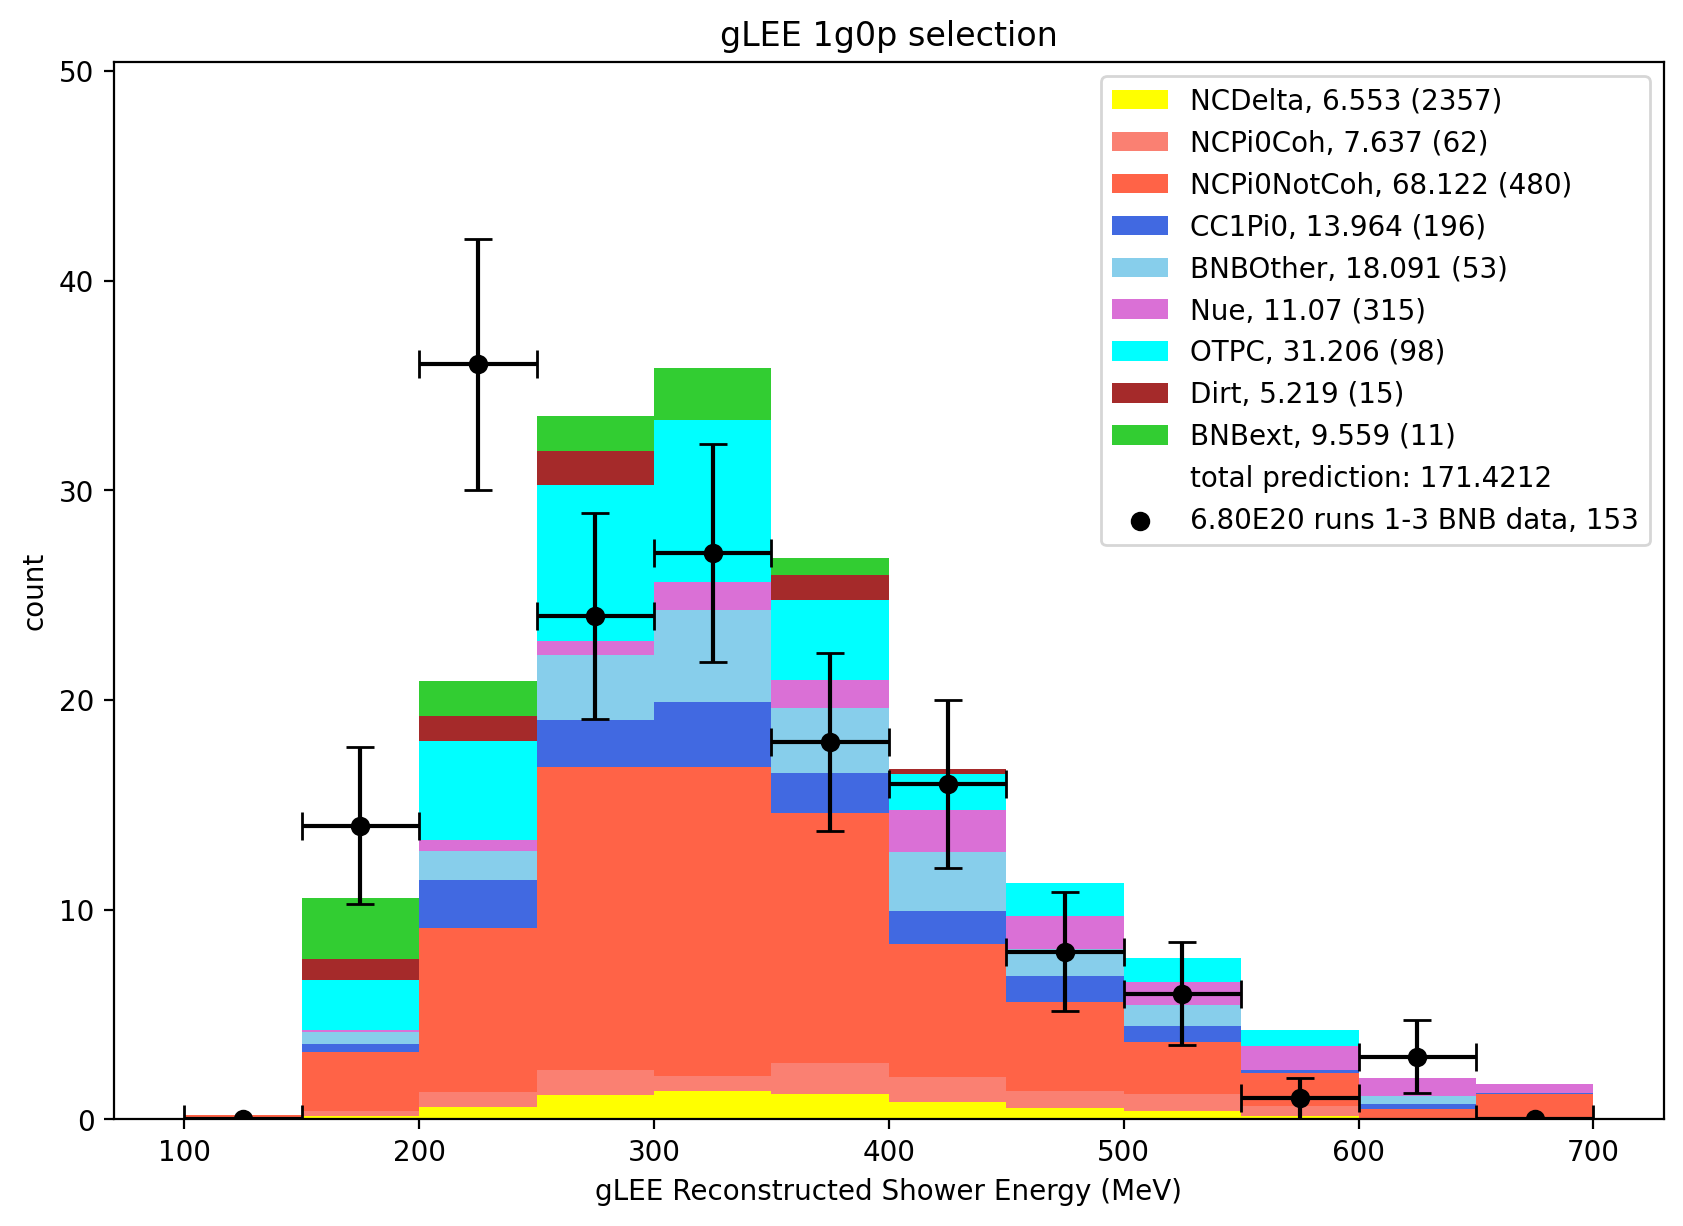

In [16]:
# plotting glee energy distributions
# should be totally unaffected by anything related to WC files

for sel in ["1g1p", "1g0p"]:

    gLEE_sel_selected_df = merged_glee_WC_comparison_df.query(f"glee_selection == '{sel}'")

    selected_e_categories = []
    selected_w_categories = []

    for q in gLEE_queries:
        selected_e_categories.append(gLEE_sel_selected_df.query(f"{q}")["reco_shower_energy_corrected"].to_numpy())
        selected_w_categories.append(gLEE_sel_selected_df.query(f"{q}")["fixed_glee_pot_weight"].to_numpy())
    
    if sel == "1g1p":
        bin_edges = [i*100. for i in range(7)]
    else:
        bin_edges = [100. + i*50. for i in range(13)]     

    bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2. for i in range(len(bin_edges) - 1)]
    num_bins = len(bin_edges) - 1

    # was used for getting total data, including outside of plot edges
    #hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=1, range=(-1e6, 1e6))
    #data_total = hist_[0]

    hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=bin_edges)

    data_points = hist_
    data_xerr = (bin_edges[1] - bin_edges[0]) / 2.
    data_yerr = [np.sqrt(x) for x in data_points]
    data_total = np.sum(data_points)

    plt.figure(dpi=200, figsize=(10,7))

    total_counts = []
    for i in range(len(selected_e_categories)):
        hist_, bin_edges_ = np.histogram(selected_e_categories[i], bins=1, range=(bin_edges[0], bin_edges[-1]), weights=selected_w_categories[i])
        total_counts.append(hist_[0])
    legend_strings = [gLEE_categories[i] + ", " + str(np.round(total_counts[i], 3)) + " (" + str(len(selected_e_categories[i])) + ")" for i in range(len(gLEE_categories))]

    plt.plot([], [], " ", label="total prediction: " + str(np.round(np.sum(total_counts), 4)))

    n_, bins_, patches = plt.hist(selected_e_categories, bins=bin_edges, weights=selected_w_categories, color=gLEE_colors, label=legend_strings, stacked=True)

    total_pred_by_bin = n_[-1]

    plt.errorbar(bin_centers, data_points, yerr=data_yerr, xerr=data_xerr, fmt="none", capsize=5, c="black", zorder=10)
    plt.scatter(bin_centers, data_points, label=f"6.80E20 runs 1-3 BNB data, {data_total}", color="black", zorder=10)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [i + 1 for i in range(len(gLEE_queries))] + [0, len(gLEE_queries) + 1]
    #order = [1,2,3,4,5,6,7,8,9,10,11,0,12]
    L = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    L.set_zorder(20)

    plt.xlabel("gLEE Reconstructed Shower Energy (MeV)")

    plt.ylabel("count")
    plt.title(f"gLEE {sel} selection")

    plt.ylim(0, 1.2 * np.max(np.concatenate((total_pred_by_bin, data_points + data_yerr))))

    plt.savefig(f"plots/gLEE_{sel}_energy.png", facecolor="white")
    plt.show()


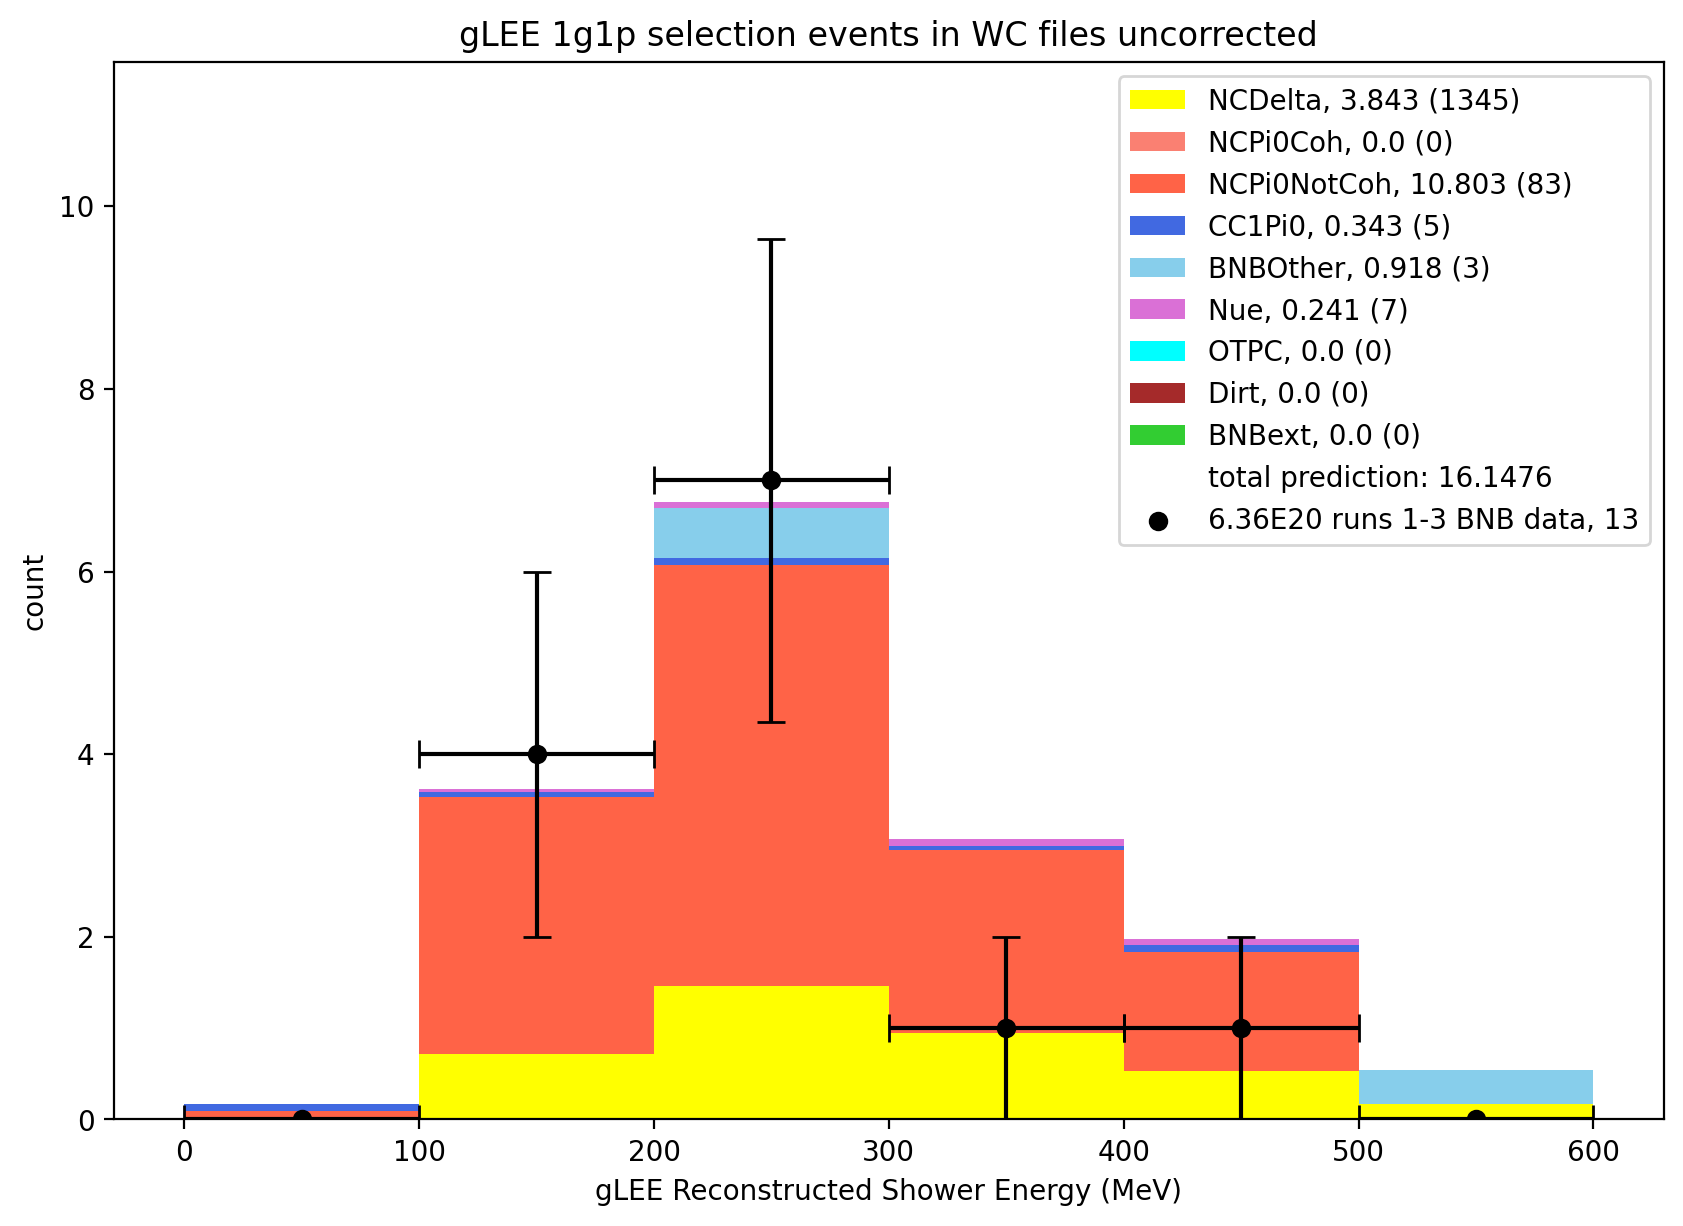

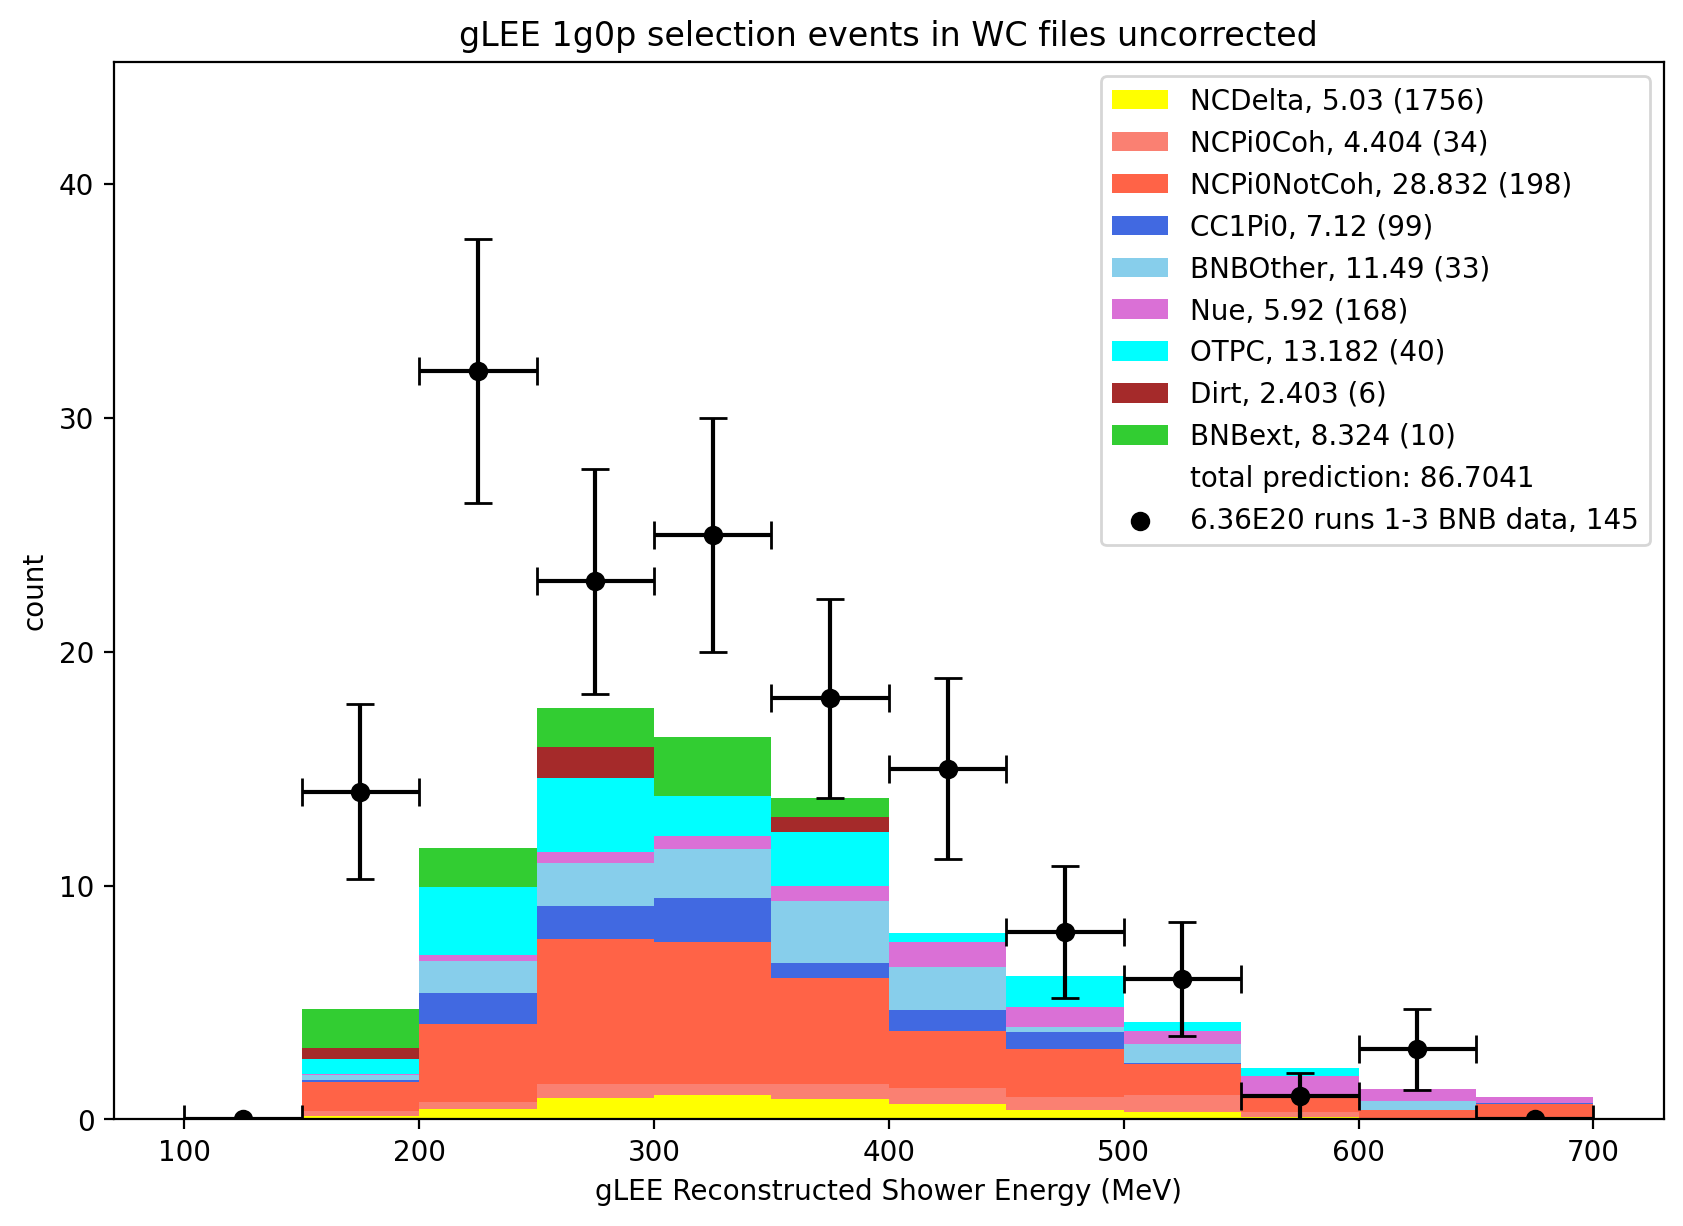

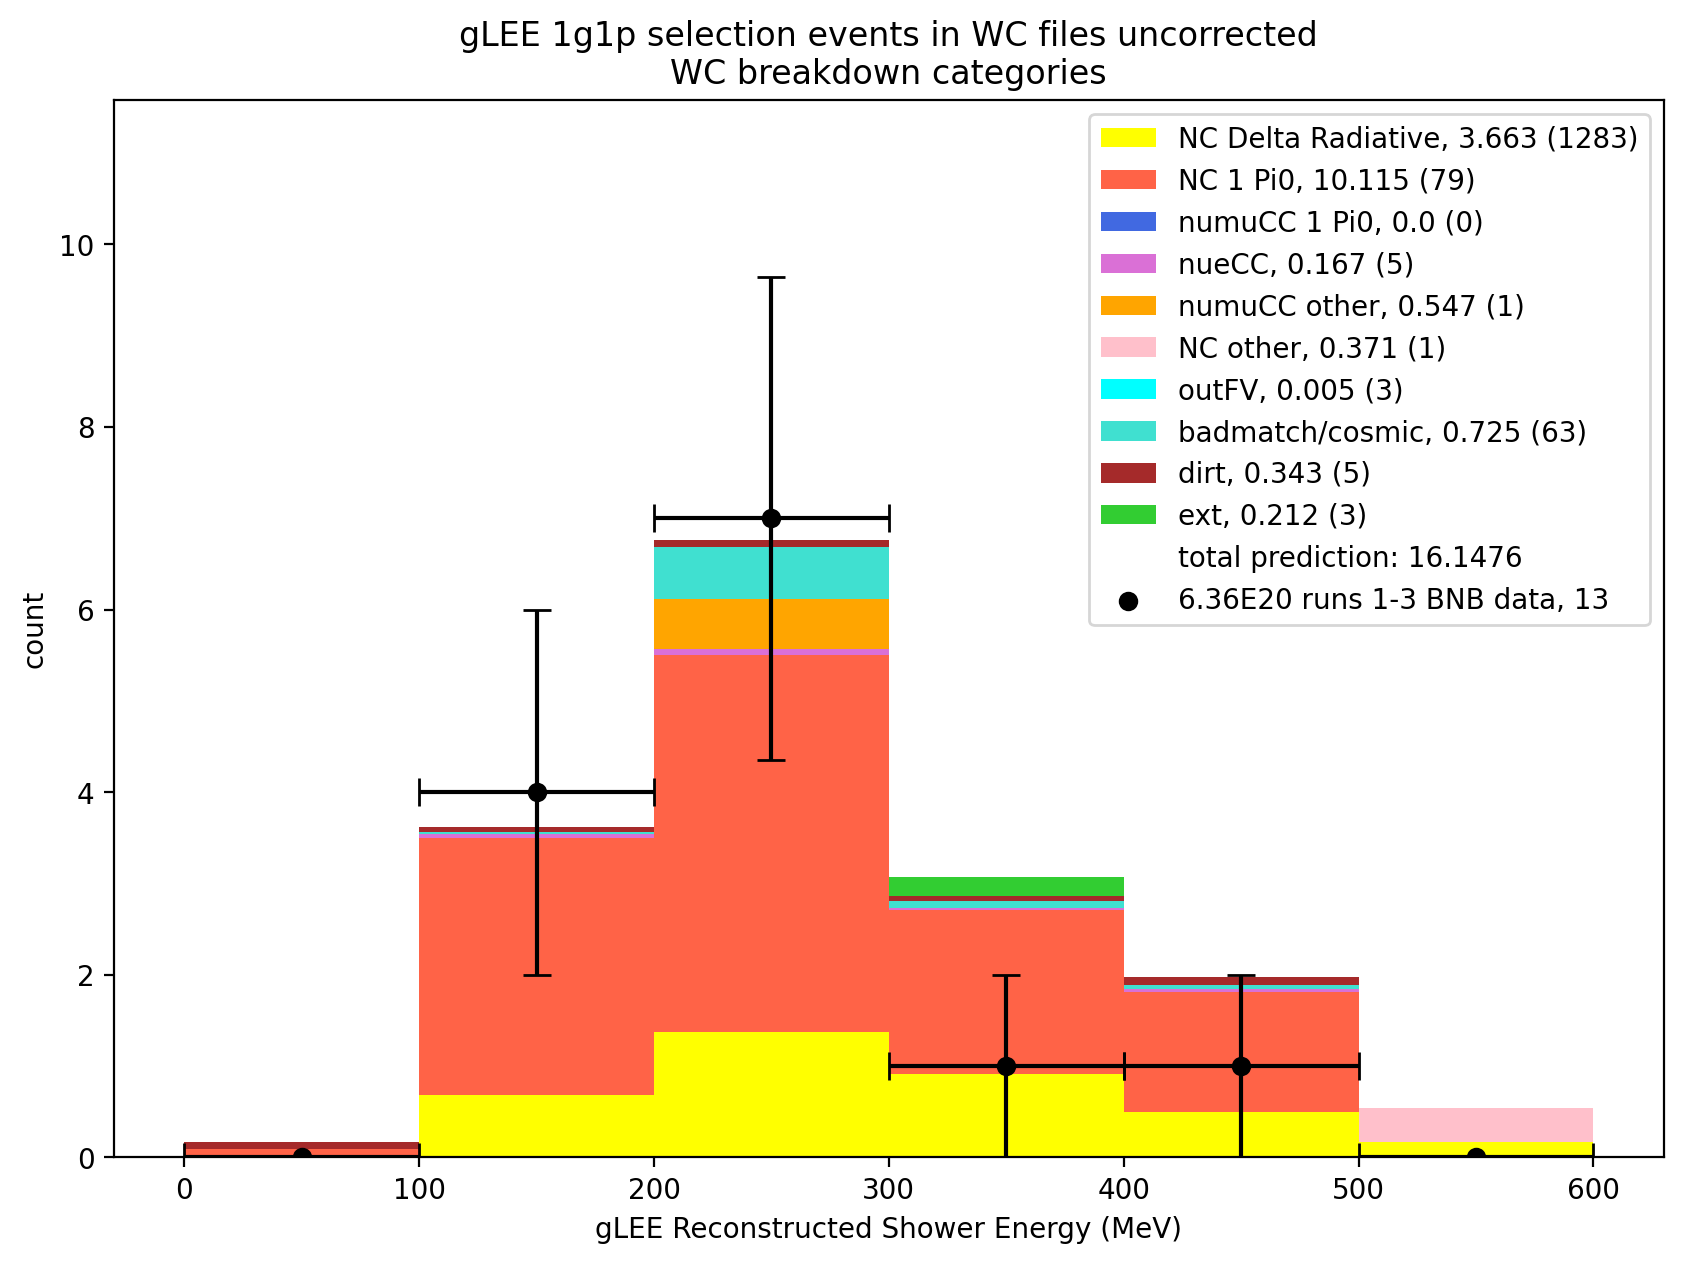

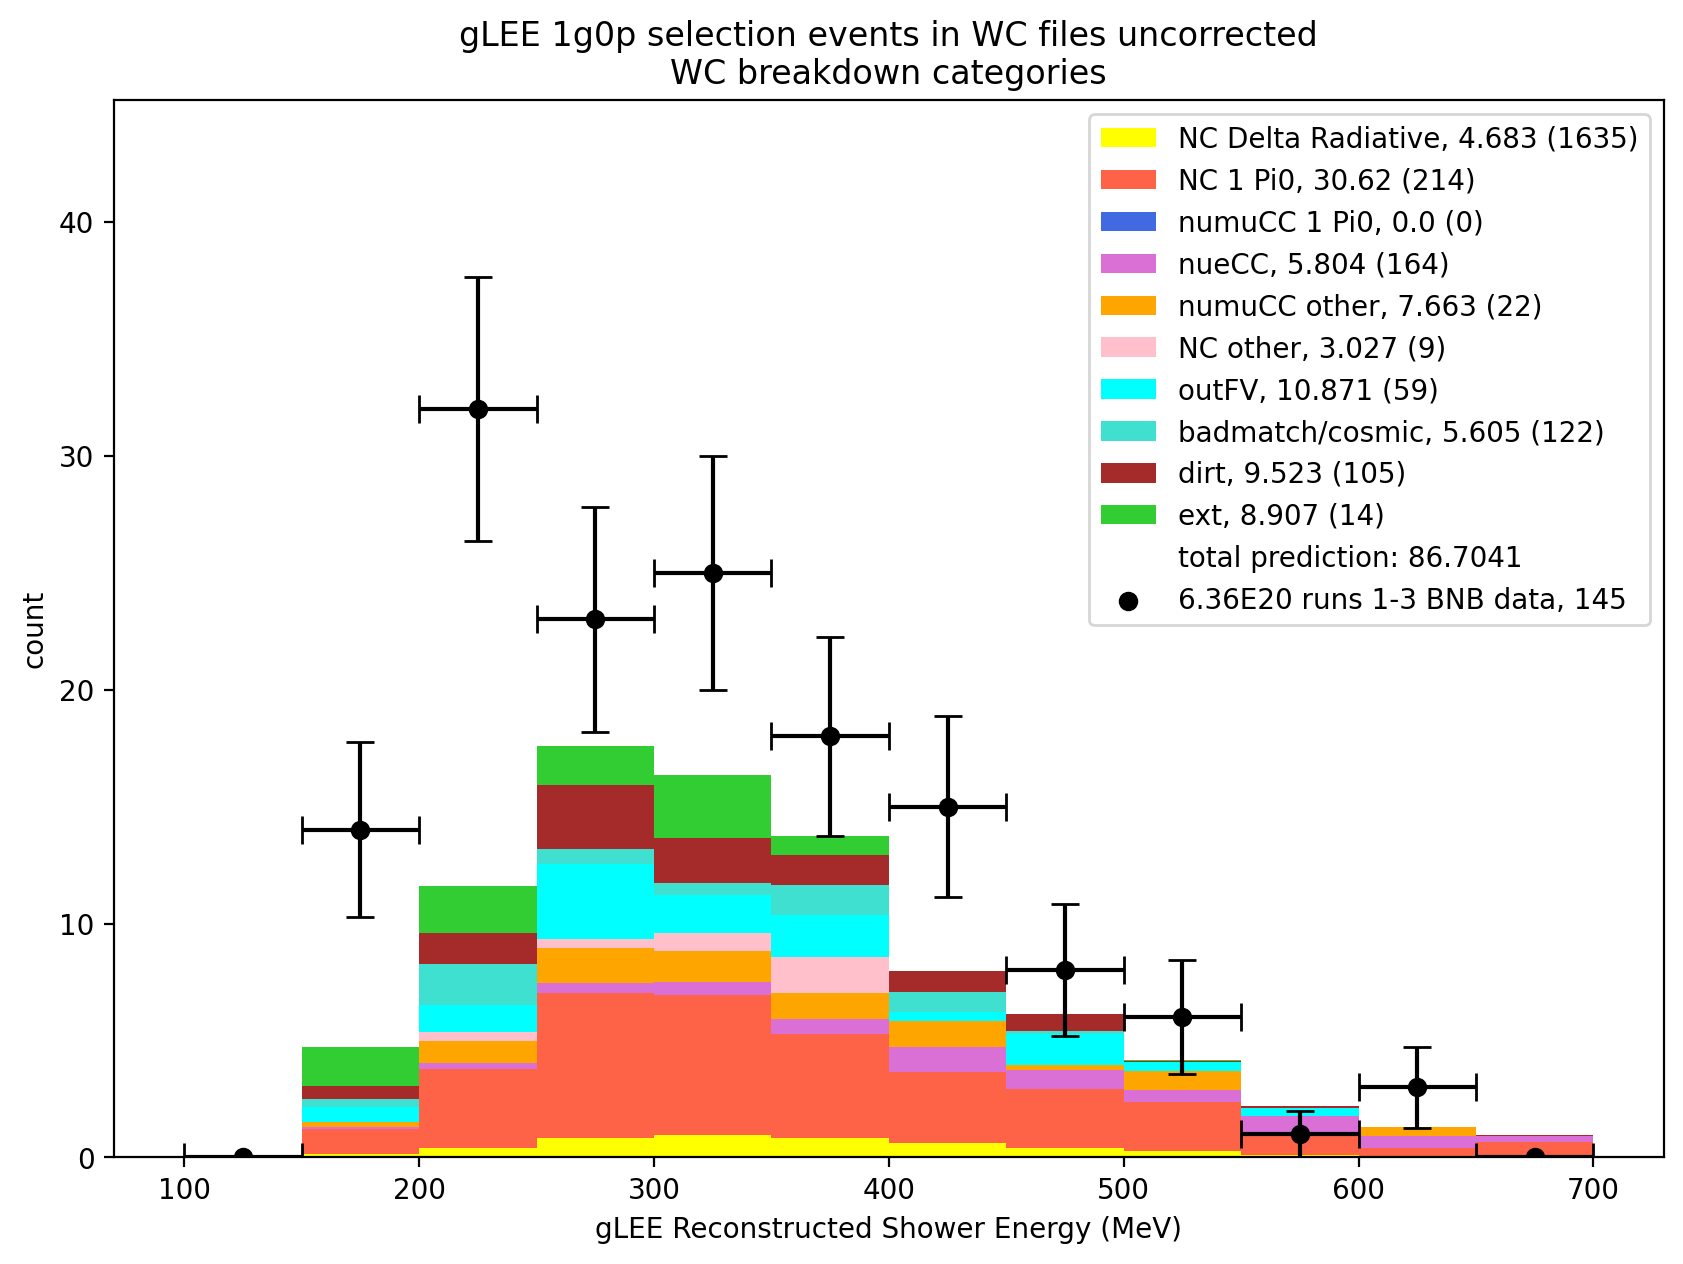

In [17]:
# plotting glee energy selections but only those in WC files
# should be biased since there's a different amount of overlap in different files

for breakdown_num in [0,1]:
    categories = [gLEE_categories, wc_categories][breakdown_num]
    queries = [gLEE_queries, wc_queries][breakdown_num]
    colors = [gLEE_colors, wc_colors][breakdown_num]
    
    for sel in ["1g1p", "1g0p"]:

        gLEE_sel_selected_df = merged_glee_WC_comparison_df.query(f"glee_selection == '{sel}' and WC_file==WC_file")

        selected_e_categories = []
        selected_w_categories = []

        for q in queries:
            selected_e_categories.append(gLEE_sel_selected_df.query(f"{q}")["reco_shower_energy_corrected"].to_numpy())
            selected_w_categories.append(gLEE_sel_selected_df.query(f"{q}")["fixed_glee_pot_weight"].to_numpy())

        if sel == "1g1p":
            bin_edges = [i*100. for i in range(7)]
        else:
            bin_edges = [100. + i*50. for i in range(13)]     

        bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2. for i in range(len(bin_edges) - 1)]
        num_bins = len(bin_edges) - 1

        # was used for getting total data, including outside of plot edges
        #hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=1, range=(-1e6, 1e6))
        #data_total = hist_[0]

        hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=bin_edges)

        data_points = hist_
        data_xerr = (bin_edges[1] - bin_edges[0]) / 2.
        data_yerr = [np.sqrt(x) for x in data_points]
        data_total = np.sum(data_points)

        plt.figure(dpi=200, figsize=(10,7))

        total_counts = []
        for i in range(len(selected_e_categories)):
            hist_, bin_edges_ = np.histogram(selected_e_categories[i], bins=1, range=(bin_edges[0], bin_edges[-1]), weights=selected_w_categories[i])
            total_counts.append(hist_[0])
        legend_strings = [categories[i] + ", " + str(np.round(total_counts[i], 3)) + " (" + str(len(selected_e_categories[i])) + ")" 
                          for i in range(len(categories))]

        plt.plot([], [], " ", label="total prediction: " + str(np.round(np.sum(total_counts), 4)))

        n_, bins_, patches = plt.hist(selected_e_categories, bins=bin_edges, weights=selected_w_categories, color=colors, label=legend_strings, stacked=True)

        total_pred_by_bin = n_[-1]

        plt.errorbar(bin_centers, data_points, yerr=data_yerr, xerr=data_xerr, fmt="none", capsize=5, c="black", zorder=10)
        plt.scatter(bin_centers, data_points, label=f"6.36E20 runs 1-3 BNB data, {data_total}", color="black", zorder=10)

        handles, labels = plt.gca().get_legend_handles_labels()
        order = [i + 1 for i in range(len(queries))] + [0, len(queries) + 1]

        #order = [1,2,3,4,5,6,7,8,9,10,11,0,12]
        L = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
        L.set_zorder(20)

        plt.xlabel("gLEE Reconstructed Shower Energy (MeV)")

        plt.ylabel("count")

        plt.ylim(0, 1.2 * np.max(np.concatenate((total_pred_by_bin, data_points + data_yerr))))

        if breakdown_num == 0:
            plt.title(f"gLEE {sel} selection events in WC files uncorrected")
        else:
            plt.title(f"gLEE {sel} selection events in WC files uncorrected\nWC breakdown categories")

        if breakdown_num == 0:
            plt.savefig(f"plots/gLEE_{sel}_energy_in_wc_files_uncorrected.png", facecolor="white")
        else:
            plt.savefig(f"plots/gLEE_{sel}_energy_in_wc_files_uncorrected_wc_breakdown.png", facecolor="white")

        plt.show()


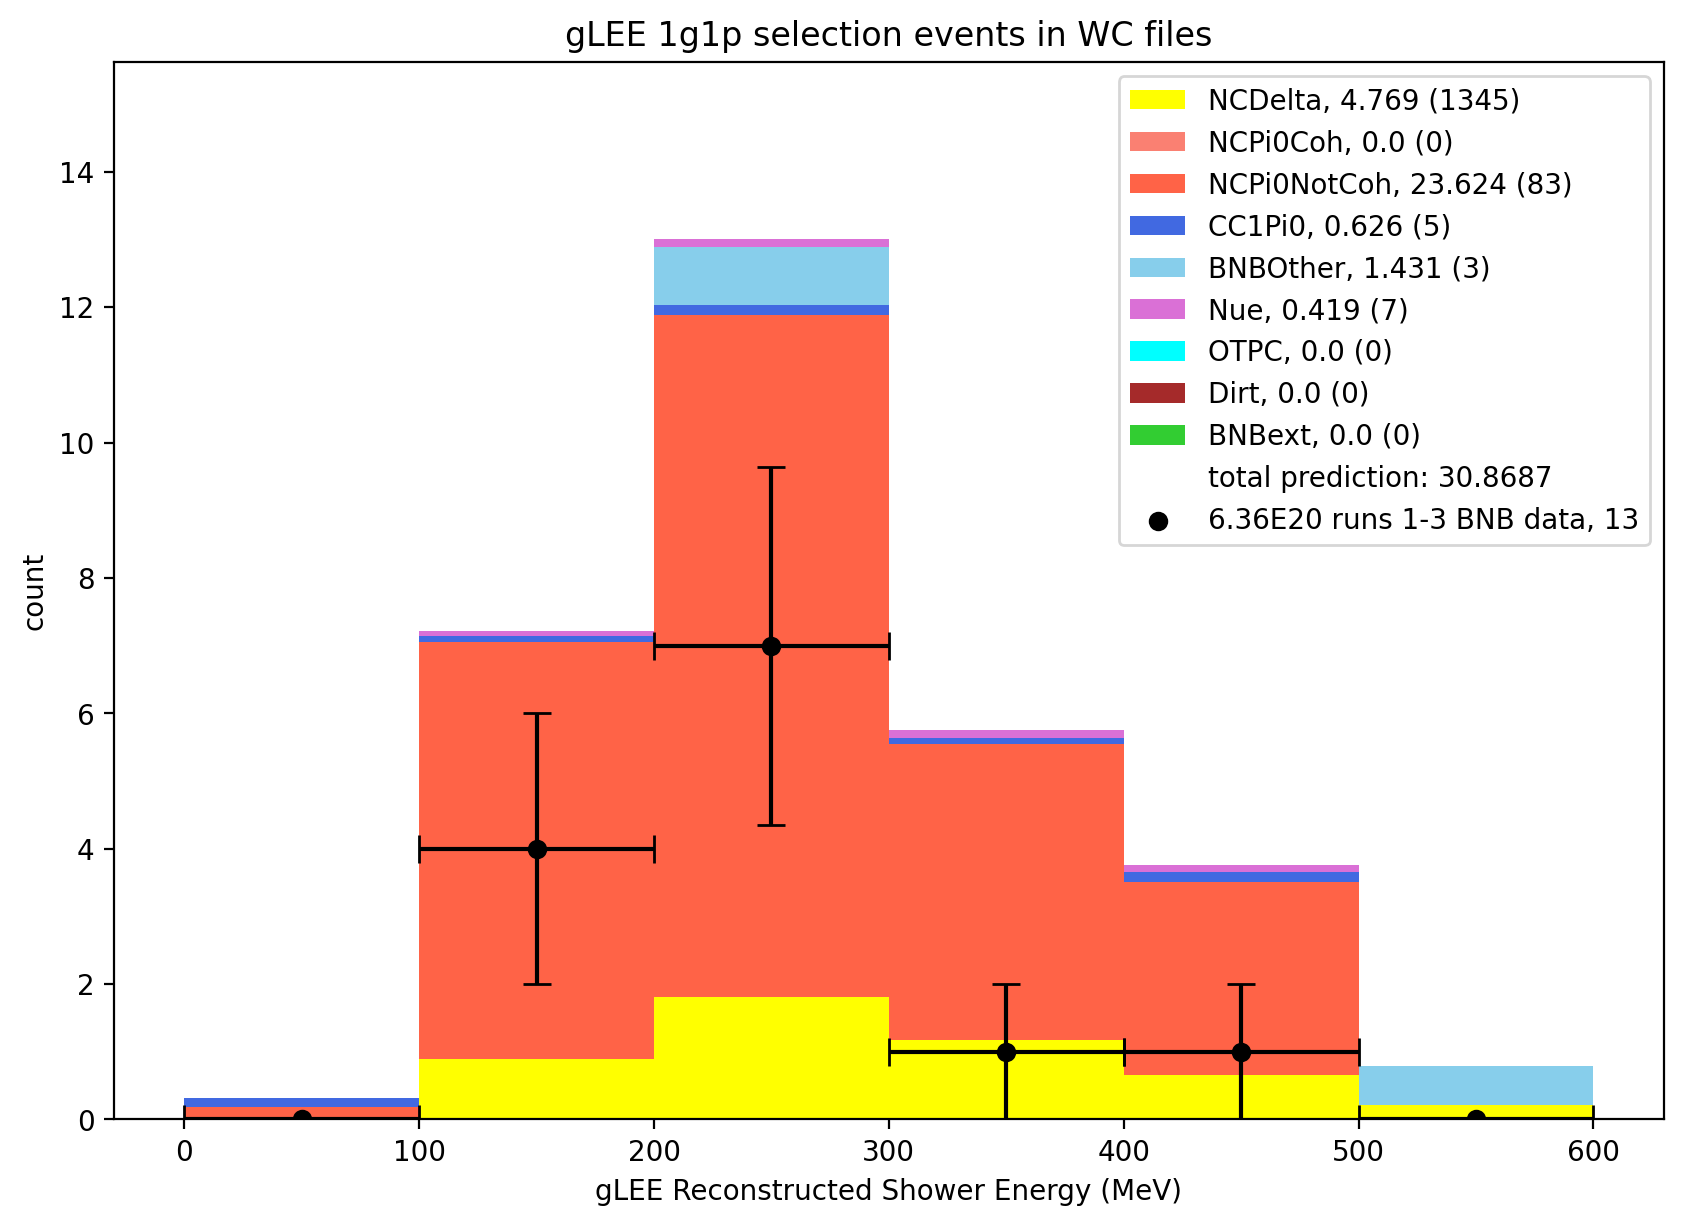

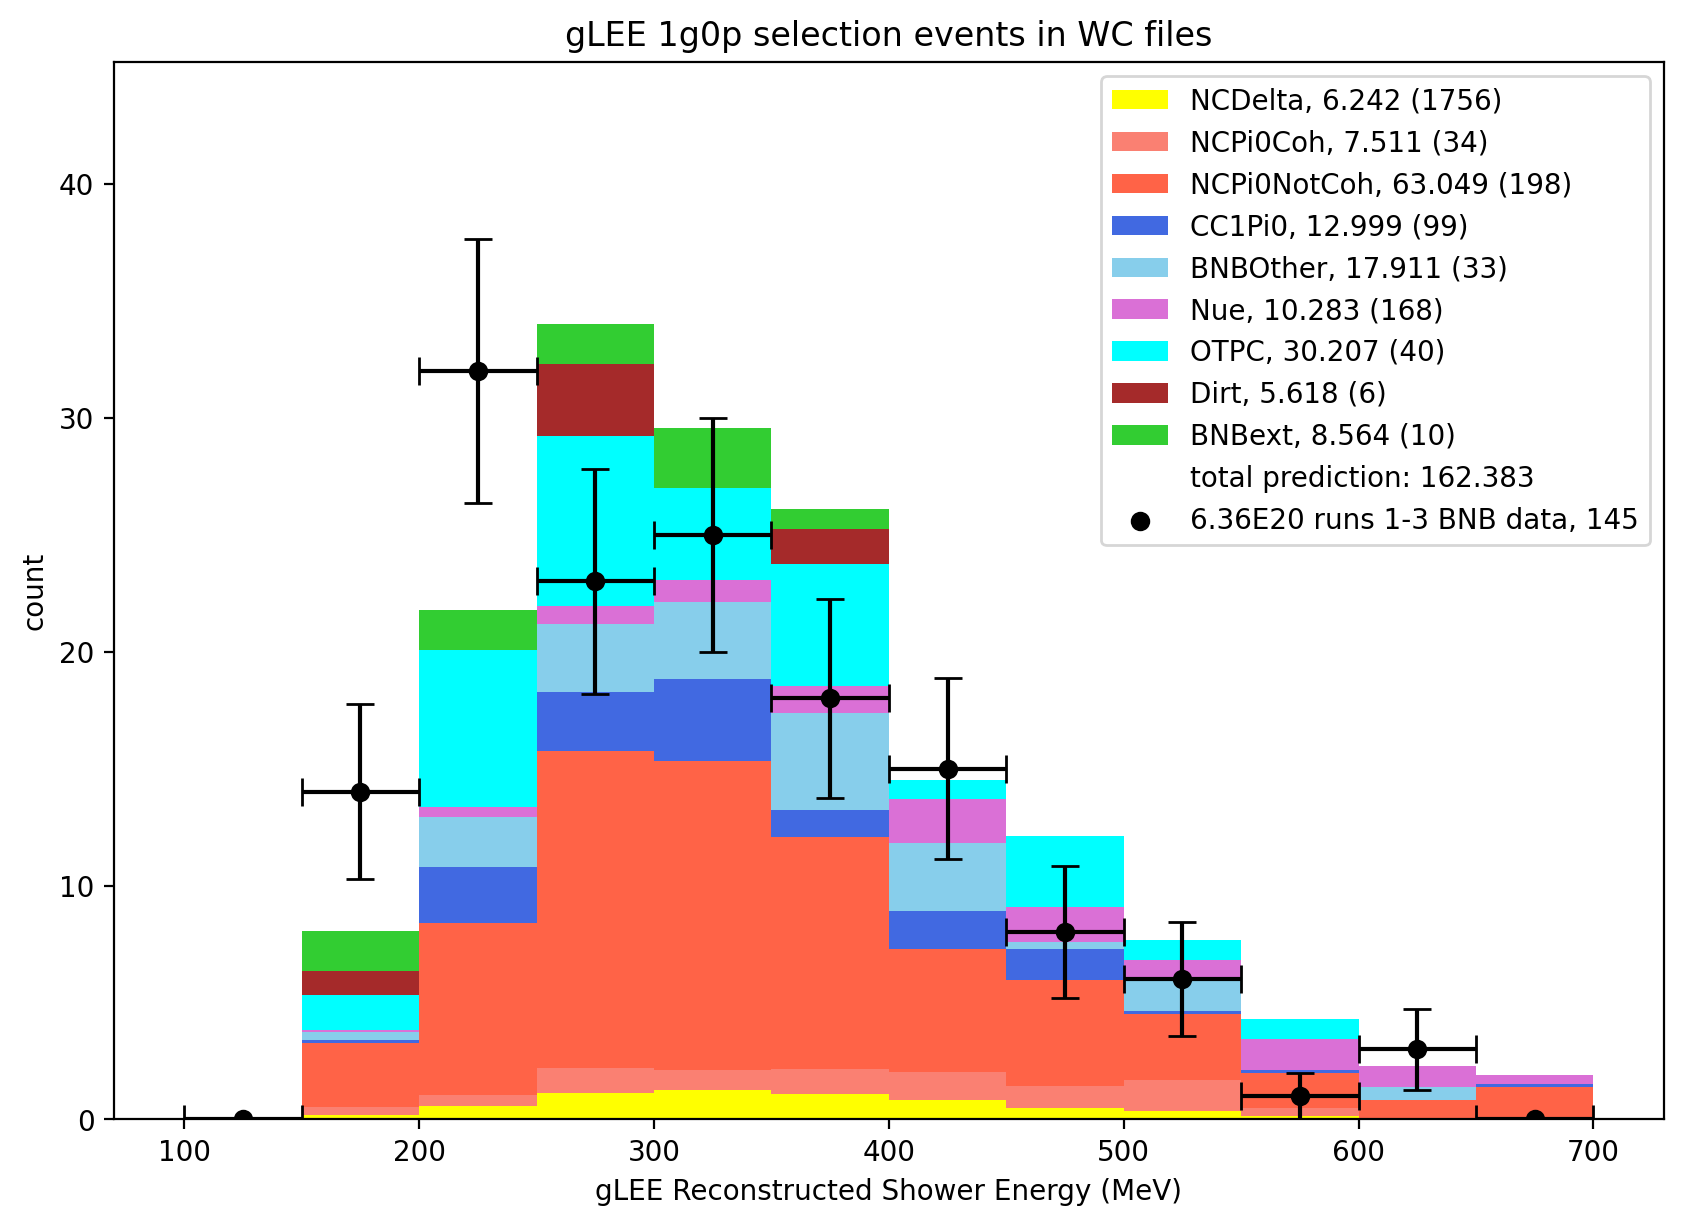

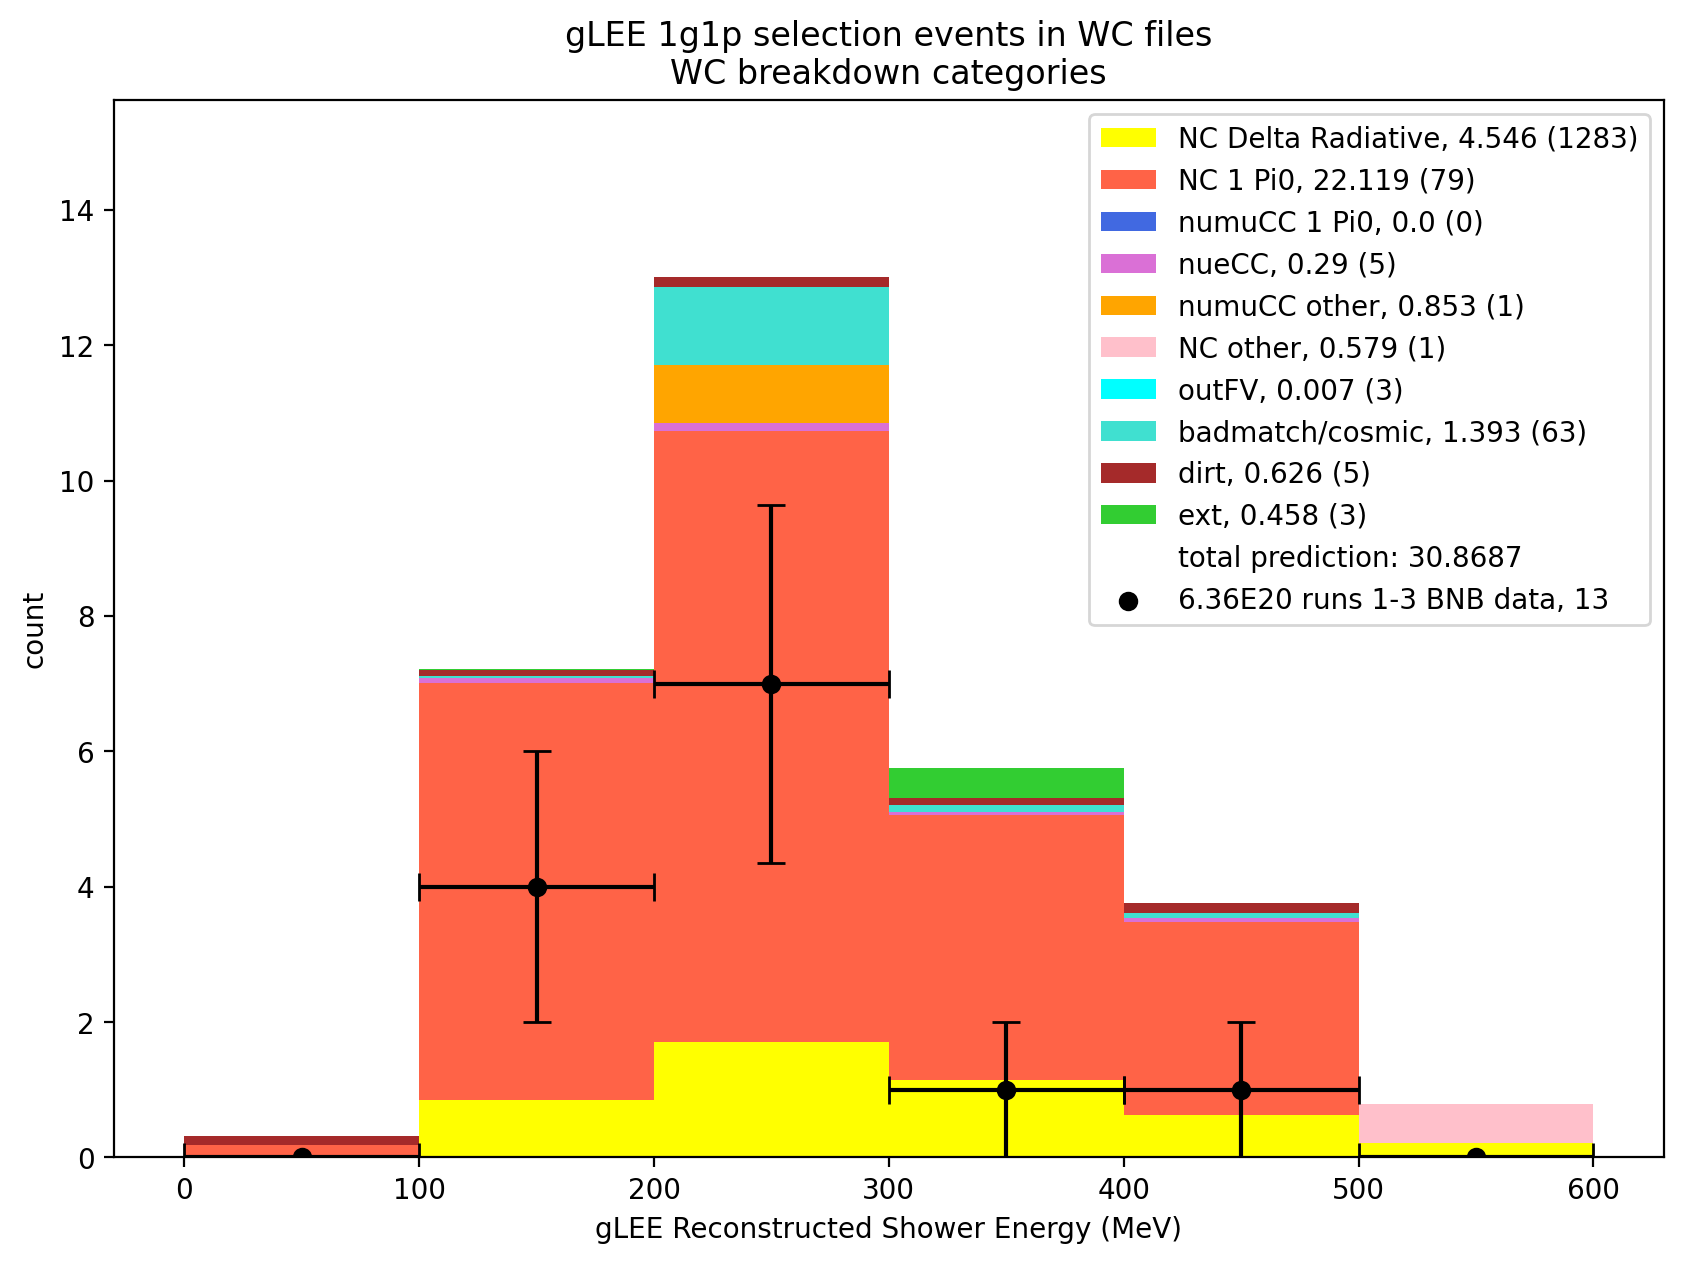

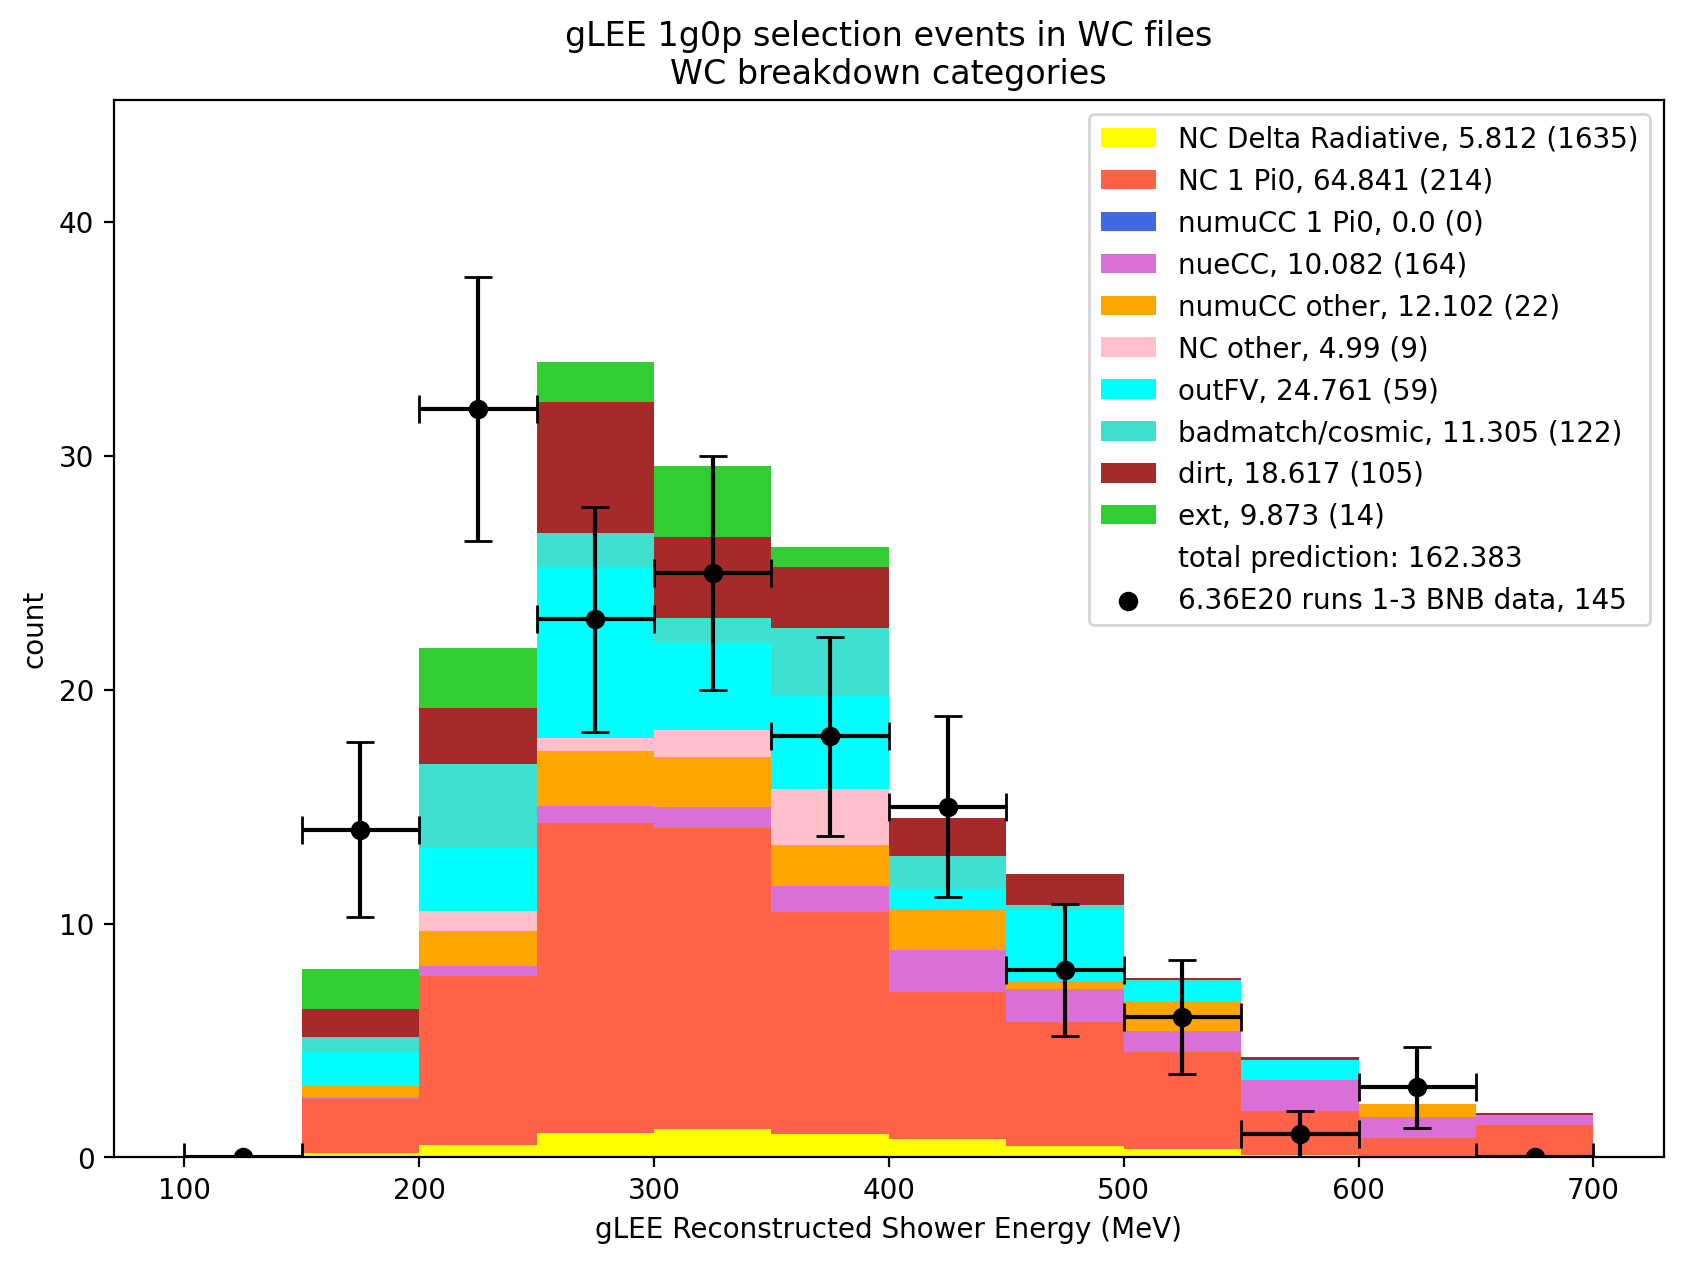

In [18]:
# plotting glee energy selections but only those in WC files
# correcting for the different amount of overlap in different files

for breakdown_num in [0,1]:
    categories = [gLEE_categories, wc_categories][breakdown_num]
    queries = [gLEE_queries, wc_queries][breakdown_num]
    colors = [gLEE_colors, wc_colors][breakdown_num]
    
    for sel in ["1g1p", "1g0p"]:

        gLEE_sel_selected_df = merged_glee_WC_comparison_df.query(f"glee_selection == '{sel}' and WC_file==WC_file")

        selected_e_categories = []
        selected_w_categories = []

        for q in queries:
            selected_e_categories.append(gLEE_sel_selected_df.query(f"{q}")["reco_shower_energy_corrected"].to_numpy())
            selected_w_categories.append(gLEE_sel_selected_df.query(f"{q}")["fixed_glee_pot_weight_corrected"].to_numpy())

        if sel == "1g1p":
            bin_edges = [i*100. for i in range(7)]
        else:
            bin_edges = [100. + i*50. for i in range(13)]     

        bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2. for i in range(len(bin_edges) - 1)]
        num_bins = len(bin_edges) - 1

        # was used for getting total data, including outside of plot edges
        #hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=1, range=(-1e6, 1e6))
        #data_total = hist_[0]

        hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=bin_edges)

        data_points = hist_
        data_xerr = (bin_edges[1] - bin_edges[0]) / 2.
        data_yerr = [np.sqrt(x) for x in data_points]
        data_total = np.sum(data_points)

        plt.figure(dpi=200, figsize=(10,7))

        total_counts = []
        for i in range(len(selected_e_categories)):
            hist_, bin_edges_ = np.histogram(selected_e_categories[i], bins=1, range=(bin_edges[0], bin_edges[-1]), weights=selected_w_categories[i])
            total_counts.append(hist_[0])
        legend_strings = [categories[i] + ", " + str(np.round(total_counts[i], 3)) + " (" + str(len(selected_e_categories[i])) + ")" 
                          for i in range(len(categories))]

        plt.plot([], [], " ", label="total prediction: " + str(np.round(np.sum(total_counts), 4)))

        n_, bins_, patches = plt.hist(selected_e_categories, bins=bin_edges, weights=selected_w_categories, color=colors, label=legend_strings, stacked=True)

        total_pred_by_bin = n_[-1]

        plt.errorbar(bin_centers, data_points, yerr=data_yerr, xerr=data_xerr, fmt="none", capsize=5, c="black", zorder=10)
        plt.scatter(bin_centers, data_points, label=f"6.36E20 runs 1-3 BNB data, {data_total}", color="black", zorder=10)

        handles, labels = plt.gca().get_legend_handles_labels()
        order = [i + 1 for i in range(len(queries))] + [0, len(queries) + 1]
        #order = [1,2,3,4,5,6,7,8,9,10,11,0,12]
        L = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
        L.set_zorder(20)

        plt.xlabel("gLEE Reconstructed Shower Energy (MeV)")

        plt.ylabel("count")

        plt.ylim(0, 1.2 * np.max(np.concatenate((total_pred_by_bin, data_points + data_yerr))))

        
        if breakdown_num == 0:
            plt.title(f"gLEE {sel} selection events in WC files")
        else:
            plt.title(f"gLEE {sel} selection events in WC files\nWC breakdown categories")

        if breakdown_num == 0:
            plt.savefig(f"plots/gLEE_{sel}_energy_in_wc_files.png", facecolor="white")
        else:
            plt.savefig(f"plots/gLEE_{sel}_energy_in_wc_files_wc_breakdown.png", facecolor="white")
        
        plt.show()


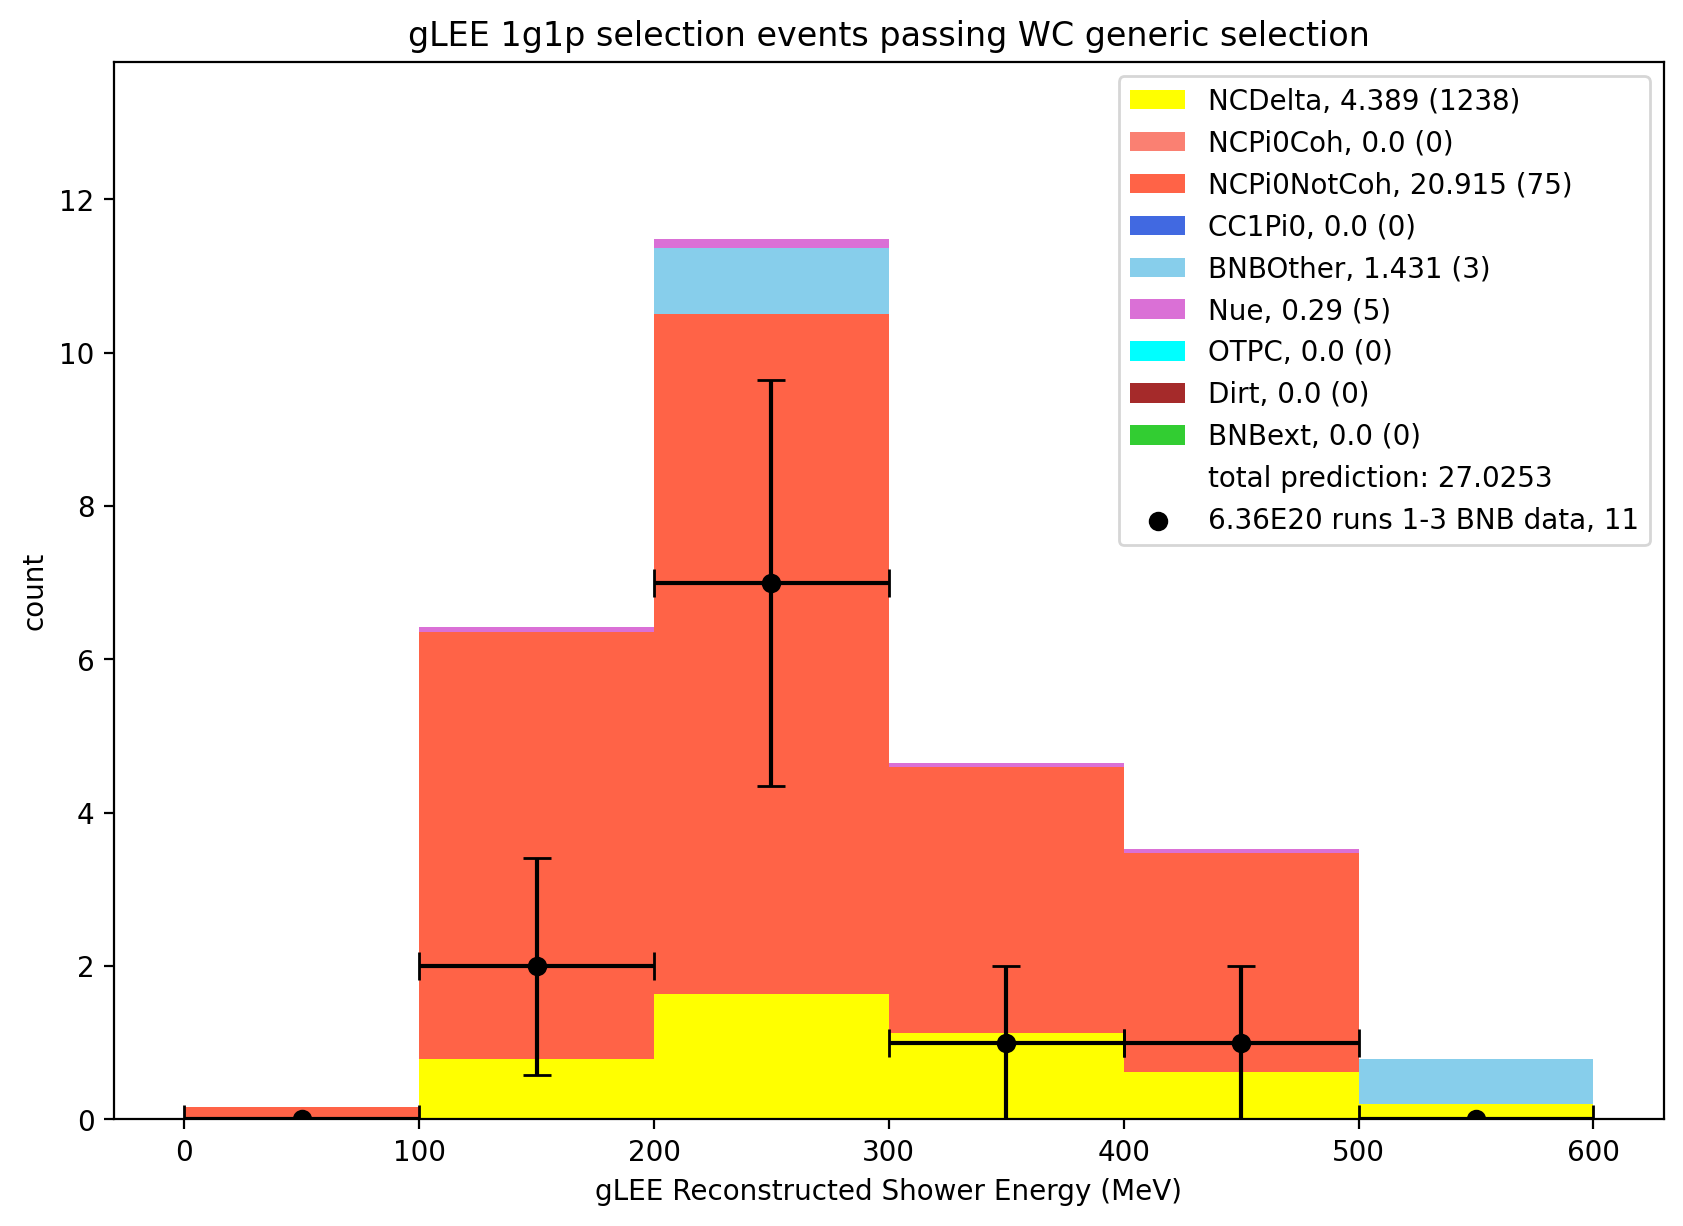

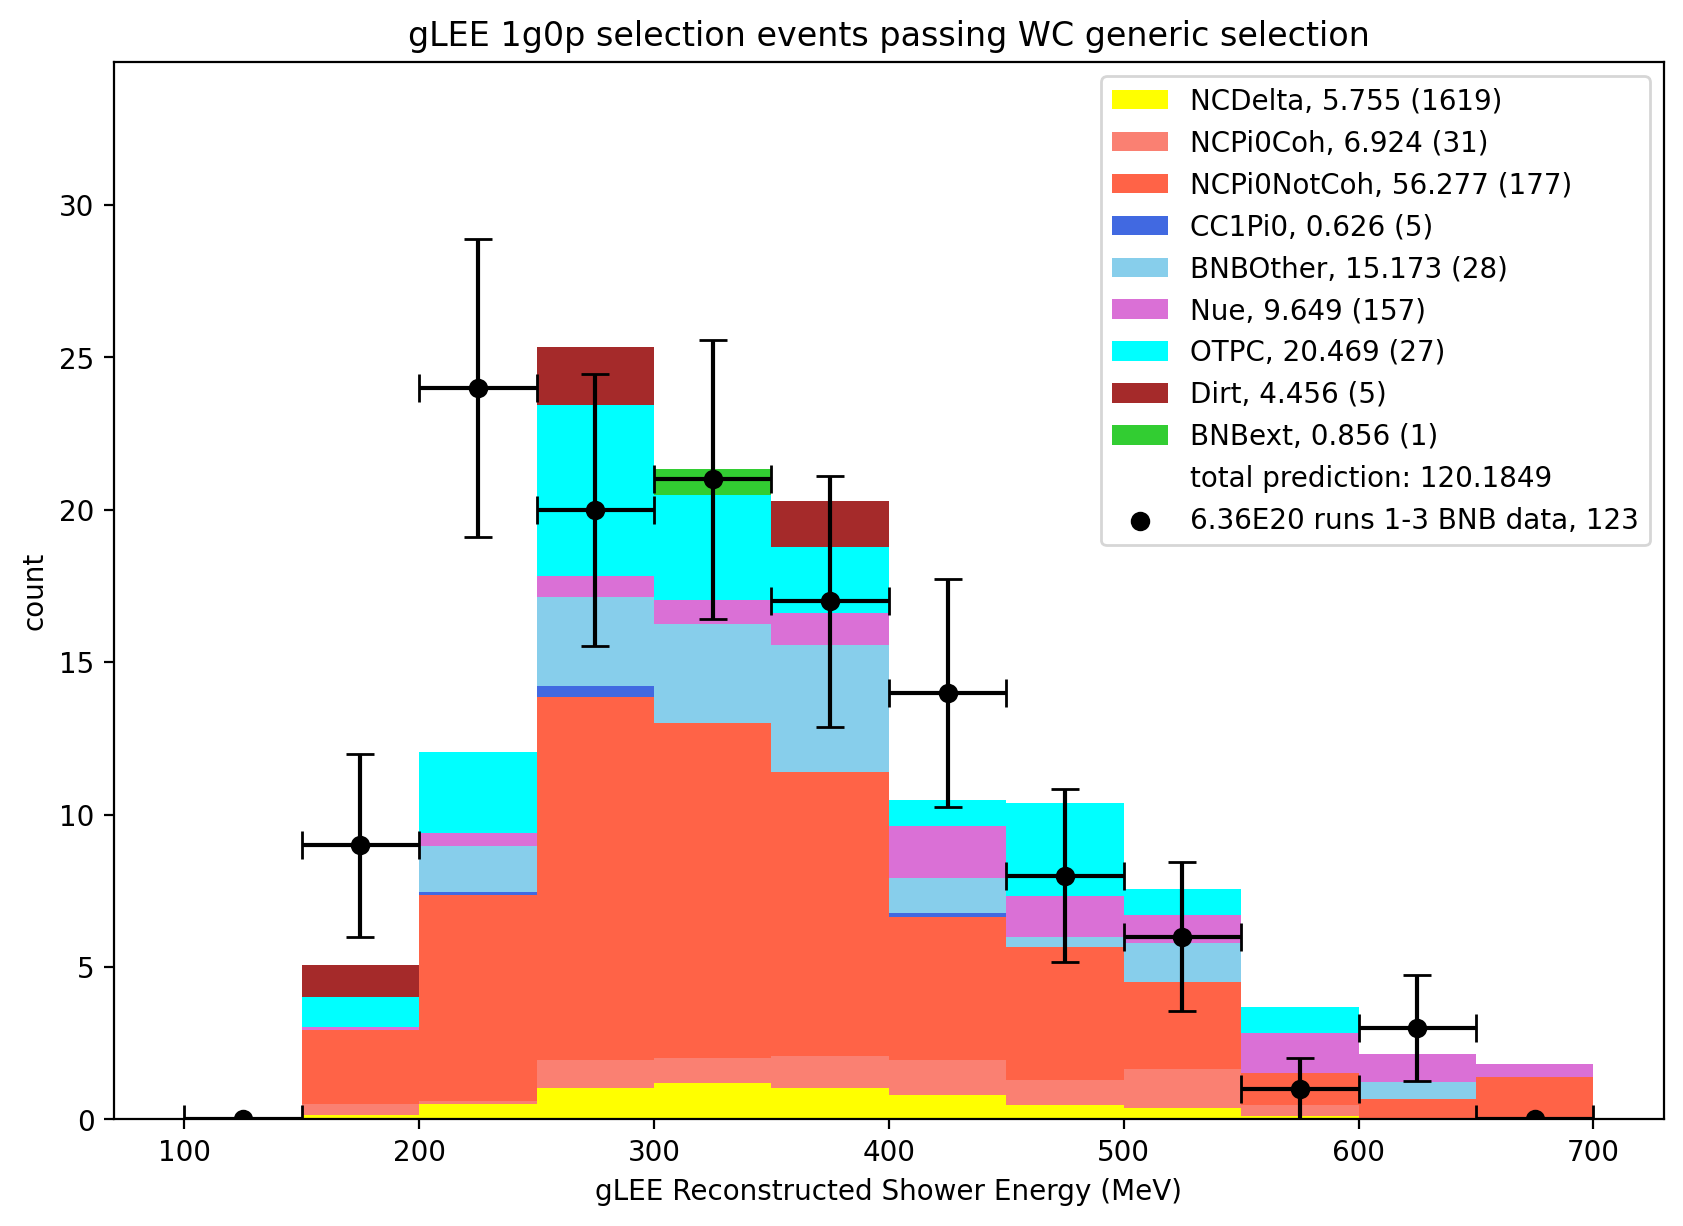

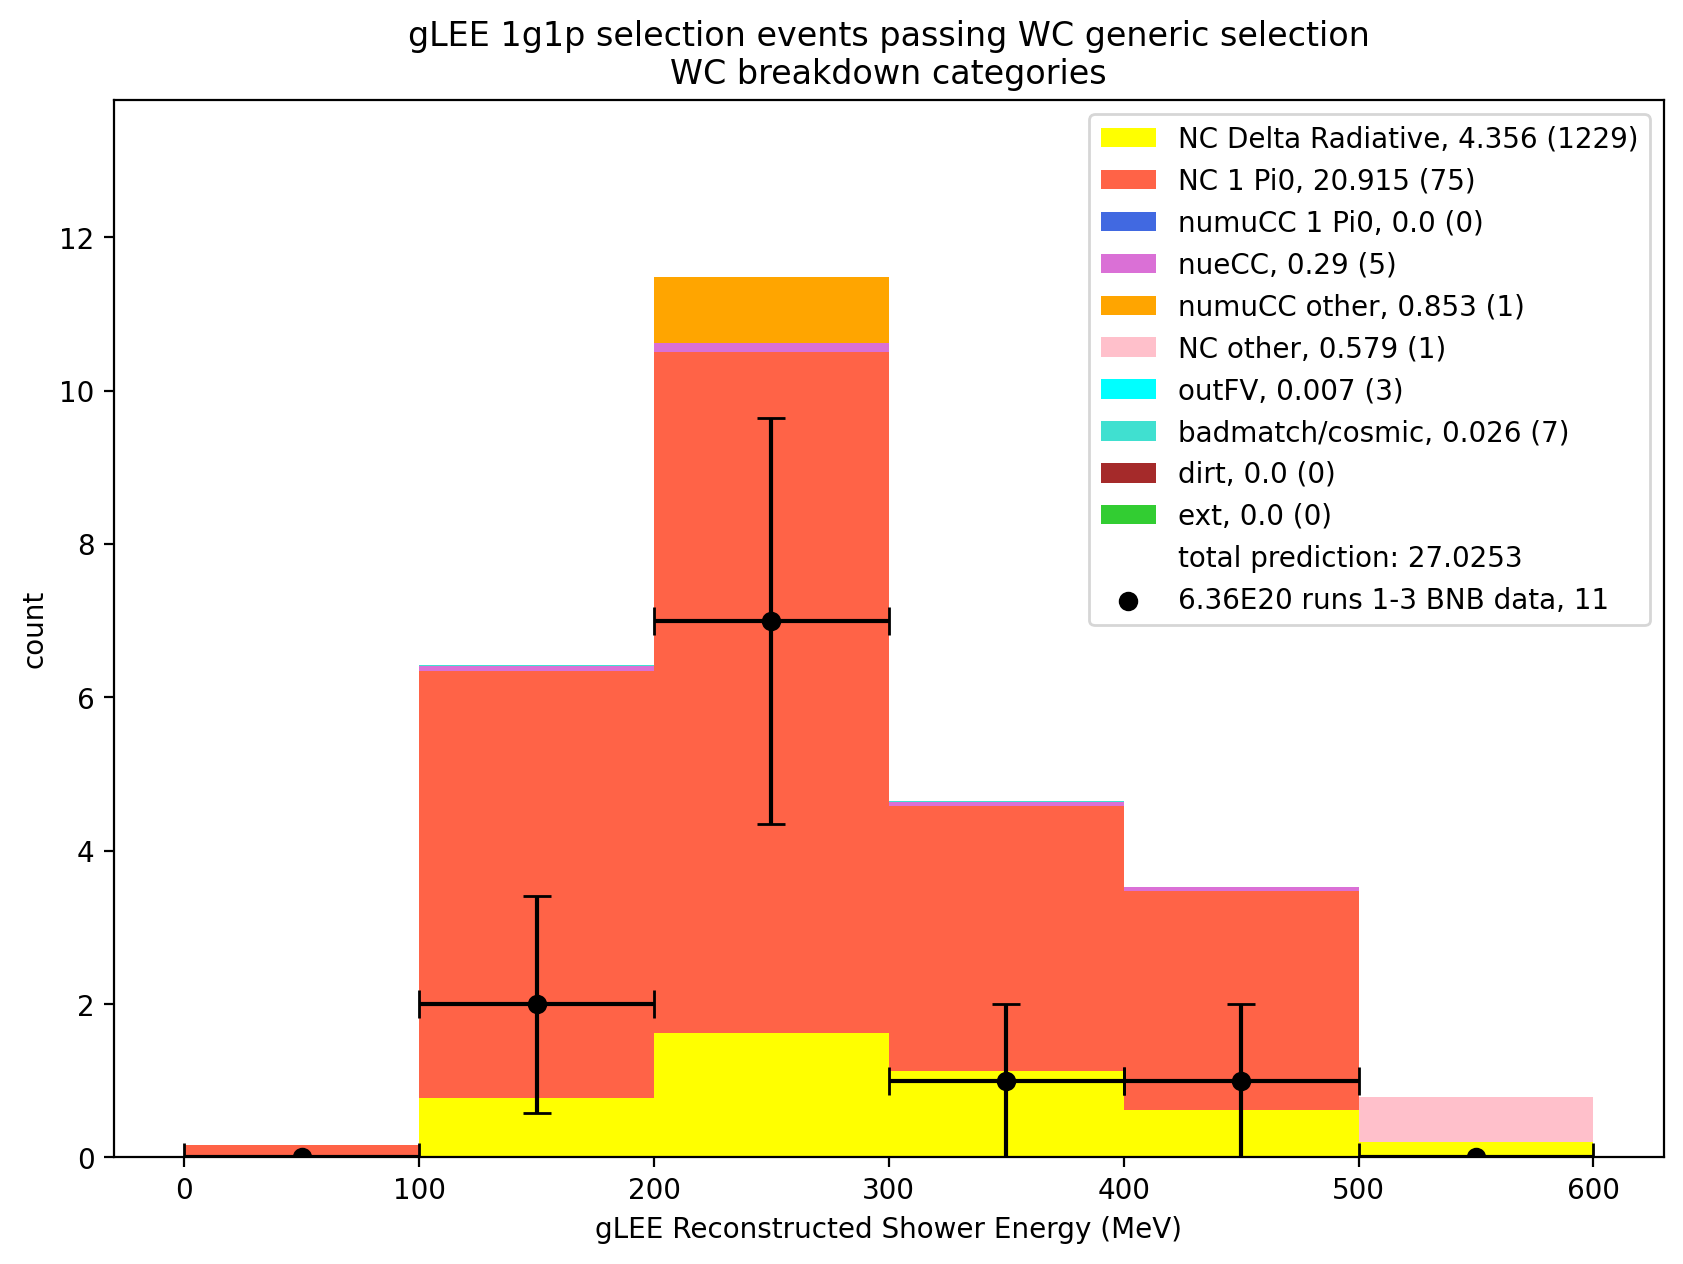

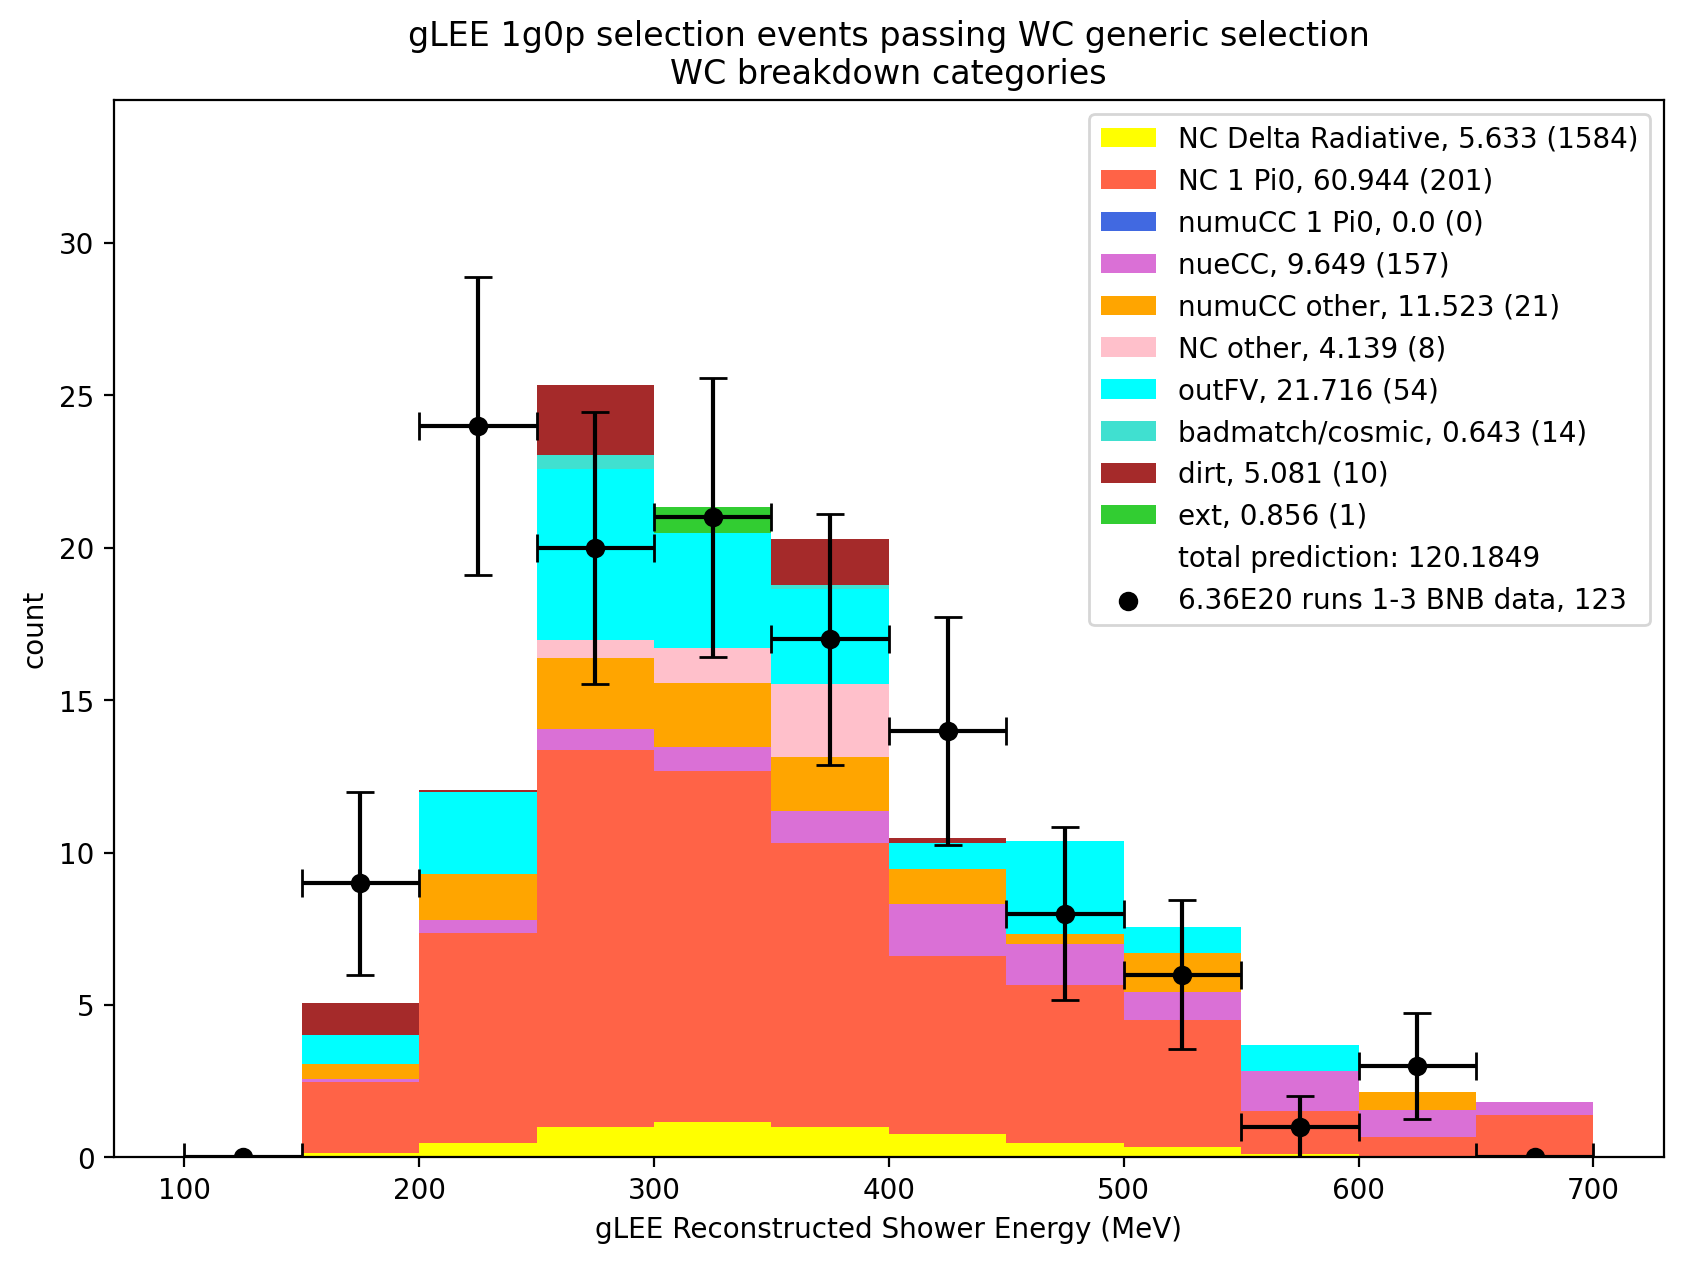

In [19]:
# plotting glee energy selections but only those passing WC generic selection

for breakdown_num in [0,1]:
    categories = [gLEE_categories, wc_categories][breakdown_num]
    queries = [gLEE_queries, wc_queries][breakdown_num]
    colors = [gLEE_colors, wc_colors][breakdown_num]

    for sel in ["1g1p", "1g0p"]:

        gLEE_sel_selected_df = merged_glee_WC_comparison_df.query(f"glee_selection == '{sel}' and kine_reco_Enu > 0")

        selected_e_categories = []
        selected_w_categories = []

        for q in queries:
            selected_e_categories.append(gLEE_sel_selected_df.query(f"{q}")["reco_shower_energy_corrected"].to_numpy())
            selected_w_categories.append(gLEE_sel_selected_df.query(f"{q}")["fixed_glee_pot_weight_corrected"].to_numpy())

        if sel == "1g1p":
            bin_edges = [i*100. for i in range(7)]
        else:
            bin_edges = [100. + i*50. for i in range(13)]     

        bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2. for i in range(len(bin_edges) - 1)]
        num_bins = len(bin_edges) - 1

        # was used for getting total data, including outside of plot edges
        #hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=1, range=(-1e6, 1e6))
        #data_total = hist_[0]

        hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=bin_edges)

        data_points = hist_
        data_xerr = (bin_edges[1] - bin_edges[0]) / 2.
        data_yerr = [np.sqrt(x) for x in data_points]
        data_total = np.sum(data_points)

        plt.figure(dpi=200, figsize=(10,7))

        total_counts = []
        for i in range(len(selected_e_categories)):
            hist_, bin_edges_ = np.histogram(selected_e_categories[i], bins=1, range=(bin_edges[0], bin_edges[-1]), weights=selected_w_categories[i])
            total_counts.append(hist_[0])
        legend_strings = [categories[i] + ", " + str(np.round(total_counts[i], 3)) + " (" + str(len(selected_e_categories[i])) + ")" 
                          for i in range(len(categories))]

        plt.plot([], [], " ", label="total prediction: " + str(np.round(np.sum(total_counts), 4)))

        n_, bins_, patches = plt.hist(selected_e_categories, bins=bin_edges, weights=selected_w_categories, color=colors, label=legend_strings, stacked=True)

        total_pred_by_bin = n_[-1]

        plt.errorbar(bin_centers, data_points, yerr=data_yerr, xerr=data_xerr, fmt="none", capsize=5, c="black", zorder=10)
        plt.scatter(bin_centers, data_points, label=f"6.36E20 runs 1-3 BNB data, {data_total}", color="black", zorder=10)

        handles, labels = plt.gca().get_legend_handles_labels()
        order = [i + 1 for i in range(len(queries))] + [0, len(queries) + 1]
        #order = [1,2,3,4,5,6,7,8,9,10,11,0,12]
        L = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
        L.set_zorder(20)

        plt.xlabel("gLEE Reconstructed Shower Energy (MeV)")

        plt.ylabel("count")

        plt.ylim(0, 1.2 * np.max(np.concatenate((total_pred_by_bin, data_points + data_yerr))))
        
        
        if breakdown_num == 0:
            plt.title(f"gLEE {sel} selection events passing WC generic selection")
        else:
            plt.title(f"gLEE {sel} selection events passing WC generic selection\nWC breakdown categories")

        if breakdown_num == 0:
            plt.savefig(f"plots/gLEE_{sel}_energy_generic.png", facecolor="white")
        else:
            plt.savefig(f"plots/gLEE_{sel}_energy_generic_wc_breakdown.png", facecolor="white")

        plt.show()


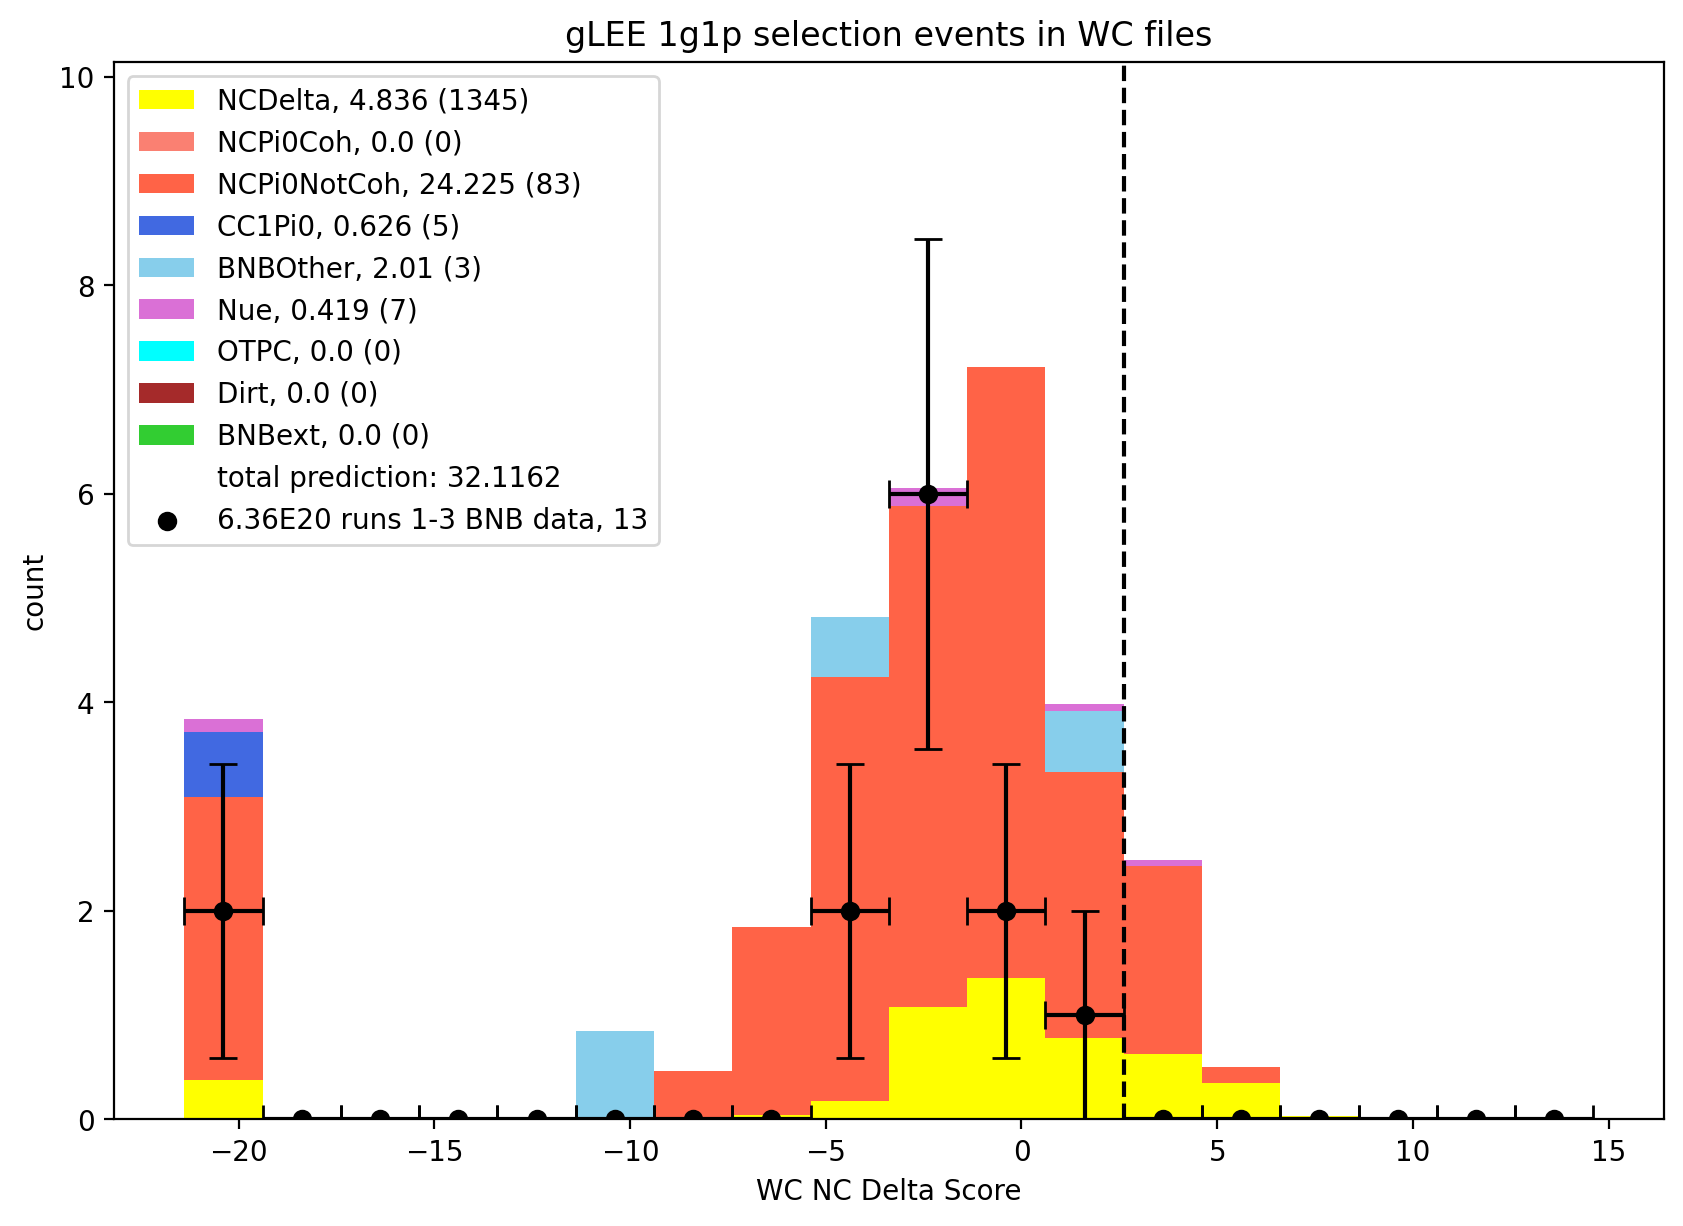

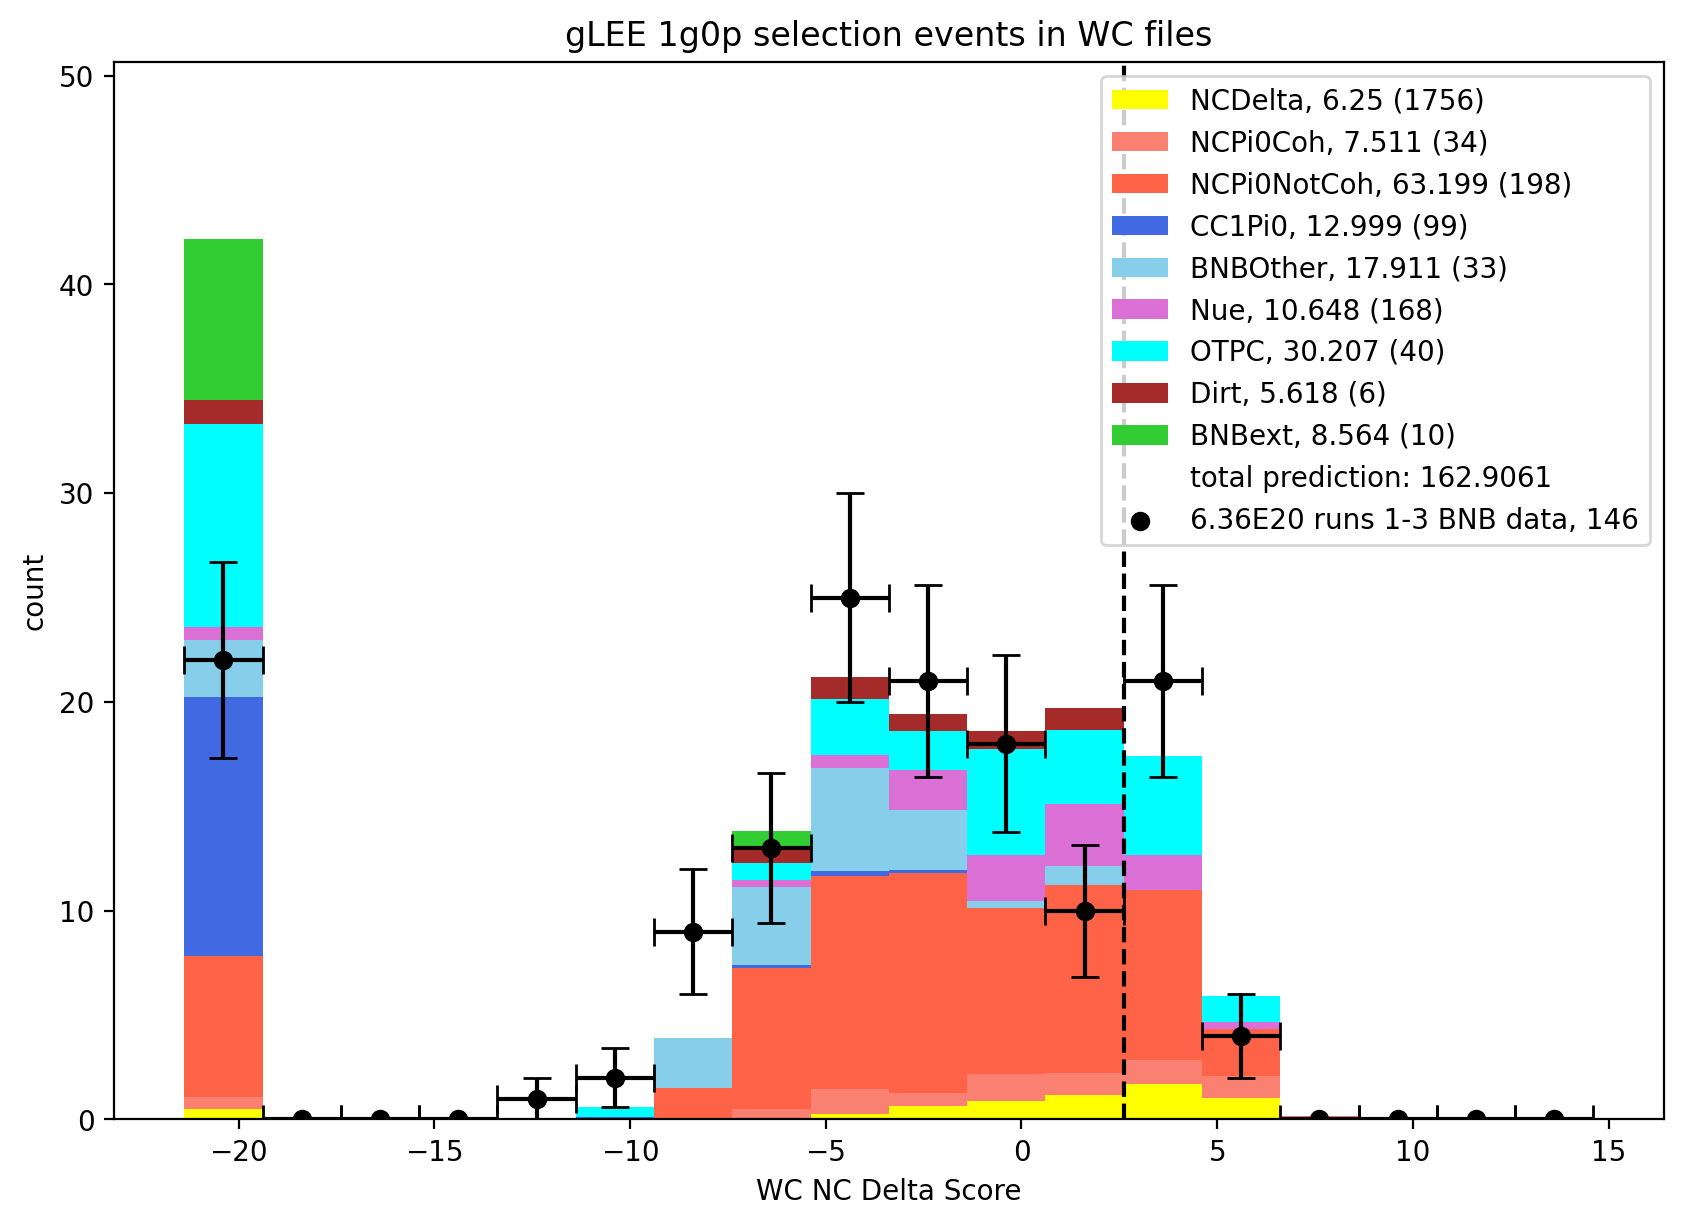

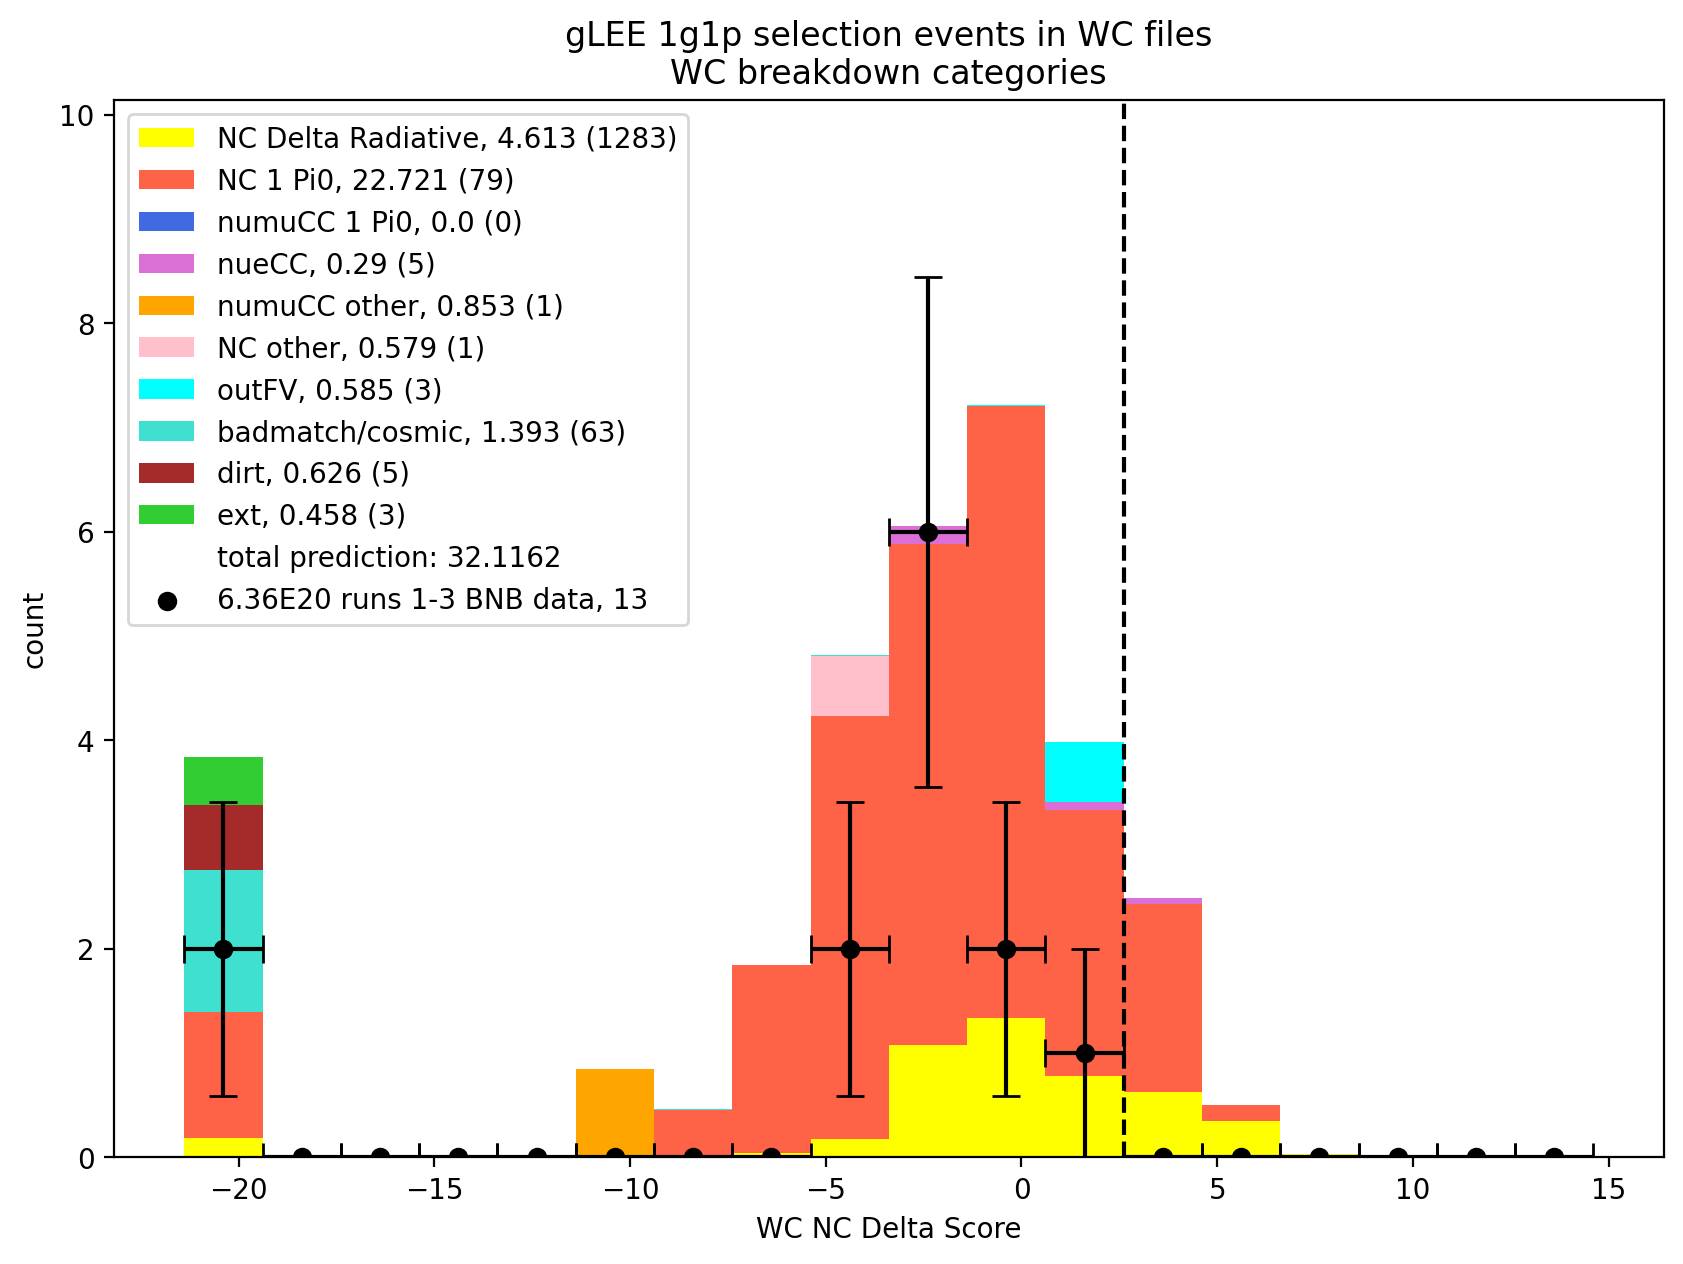

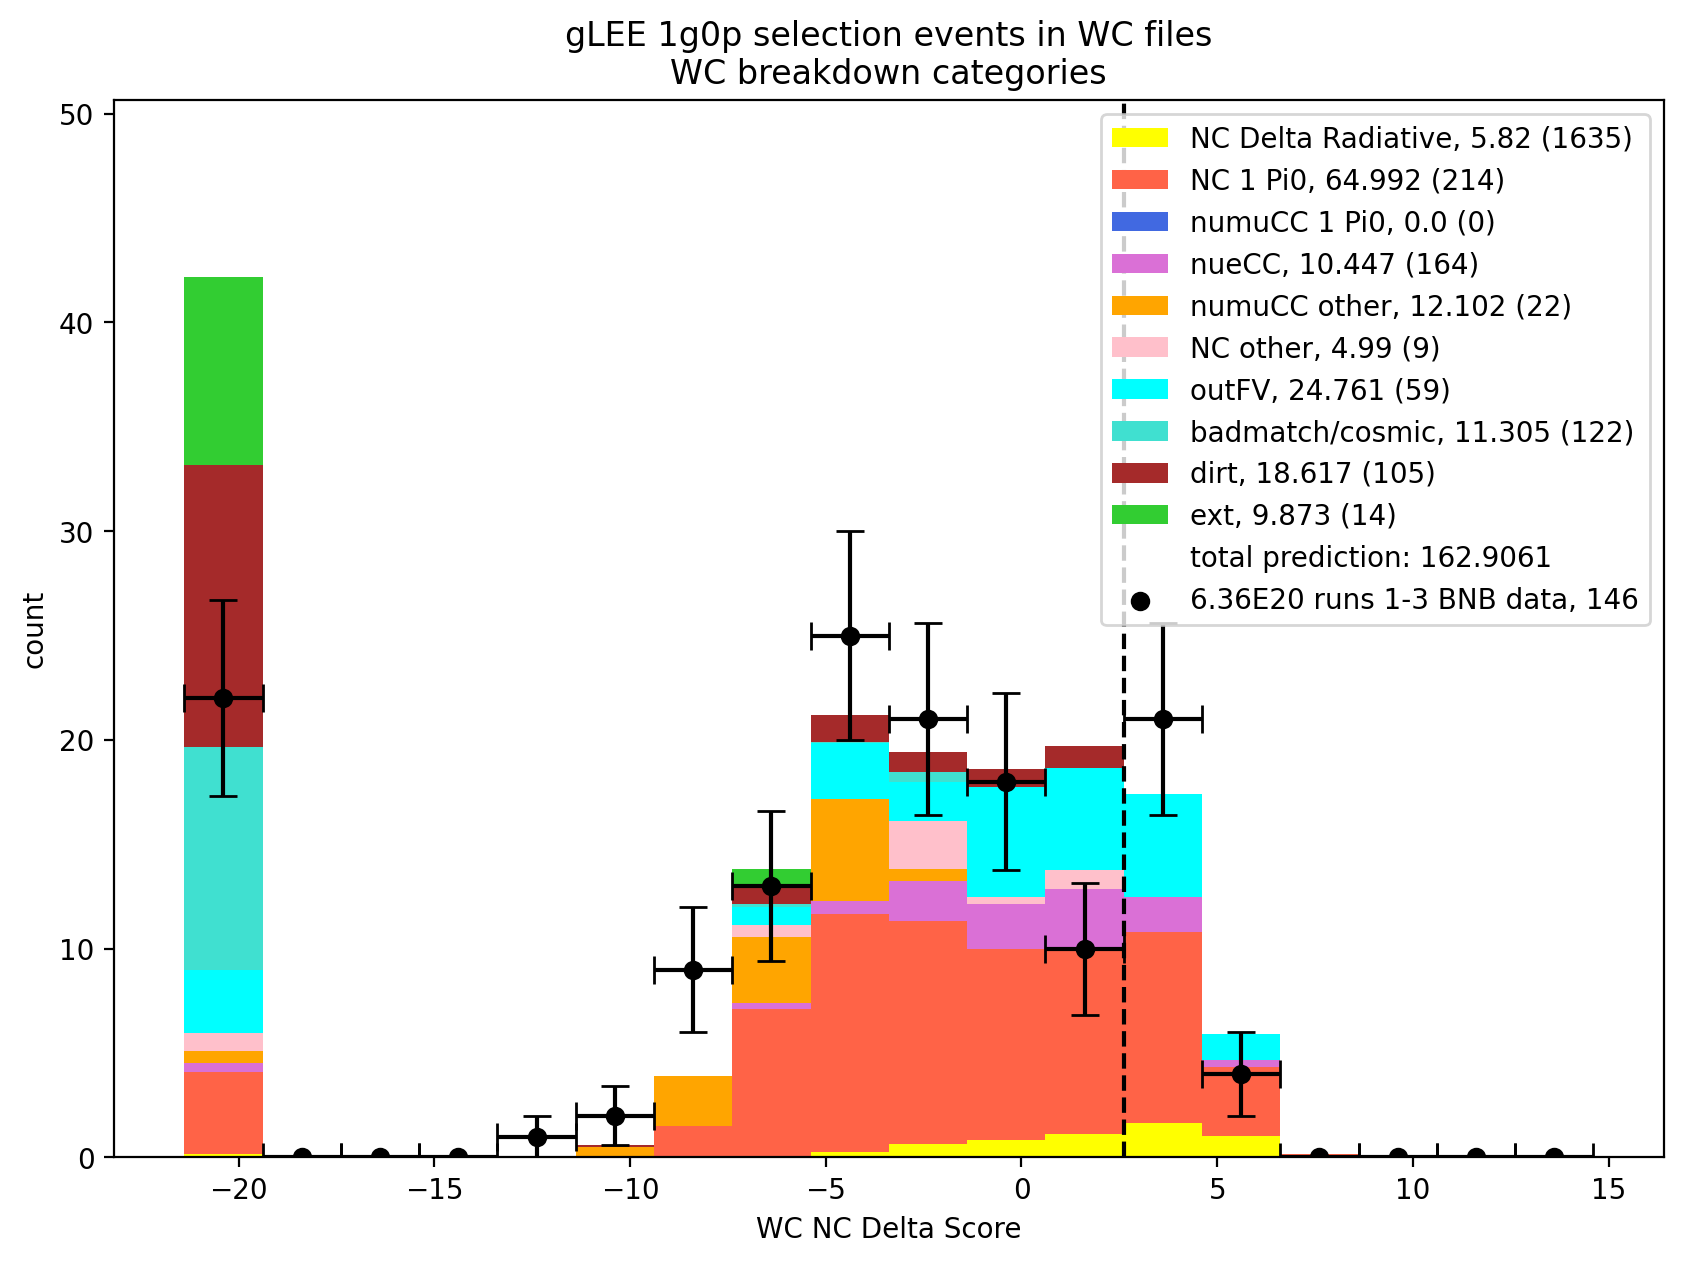

In [20]:
# plotting glee energy selections but only those in WC files
# correcting for the different amount of overlap in different files

for breakdown_num in [0,1]:
    categories = [gLEE_categories, wc_categories][breakdown_num]
    queries = [gLEE_queries, wc_queries][breakdown_num]
    colors = [gLEE_colors, wc_colors][breakdown_num]
    
    for sel in ["1g1p", "1g0p"]:

        gLEE_sel_selected_df = merged_glee_WC_comparison_df.query(f"glee_selection == '{sel}' and WC_file==WC_file")

        selected_e_categories = []
        selected_w_categories = []

        for q in queries:
            selected_e_categories.append(gLEE_sel_selected_df.query(f"{q}")["nc_delta_score"].to_numpy())
            selected_w_categories.append(gLEE_sel_selected_df.query(f"{q}")["fixed_glee_pot_weight_corrected"].to_numpy())

        bin_edges = [2. * i - 24. + 2.61 for i in range(19)]  

        bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2. for i in range(len(bin_edges) - 1)]
        num_bins = len(bin_edges) - 1

        # was used for getting total data, including outside of plot edges
        #hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), bins=1, range=(-1e6, 1e6))
        #data_total = hist_[0]

        hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred == 'data'")["nc_delta_score"].to_numpy(), bins=bin_edges)

        data_points = hist_
        data_xerr = (bin_edges[1] - bin_edges[0]) / 2.
        data_yerr = [np.sqrt(x) for x in data_points]
        data_total = np.sum(data_points)

        plt.figure(dpi=200, figsize=(10,7))

        total_counts = []
        for i in range(len(selected_e_categories)):
            hist_, bin_edges_ = np.histogram(selected_e_categories[i], bins=1, range=(bin_edges[0], bin_edges[-1]), weights=selected_w_categories[i])
            total_counts.append(hist_[0])
        legend_strings = [categories[i] + ", " + str(np.round(total_counts[i], 3)) + " (" + str(len(selected_e_categories[i])) + ")" 
                          for i in range(len(categories))]

        plt.plot([], [], " ", label="total prediction: " + str(np.round(np.sum(total_counts), 4)))

        n_, bins_, patches = plt.hist(selected_e_categories, bins=bin_edges, weights=selected_w_categories, color=colors, label=legend_strings, stacked=True)

        total_pred_by_bin = n_[-1]

        plt.errorbar(bin_centers, data_points, yerr=data_yerr, xerr=data_xerr, fmt="none", capsize=5, c="black", zorder=10)
        plt.scatter(bin_centers, data_points, label=f"6.36E20 runs 1-3 BNB data, {data_total}", color="black", zorder=10)

        handles, labels = plt.gca().get_legend_handles_labels()
        order = [i + 1 for i in range(len(queries))] + [0, len(queries) + 1]
        #order = [1,2,3,4,5,6,7,8,9,10,11,0,12]
        L = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
        L.set_zorder(20)

        plt.axvline(2.61, c="black", linestyle="dashed")


        plt.xlabel("WC NC Delta Score")

        plt.ylabel("count")

        plt.ylim(0, 1.2 * np.max(np.concatenate((total_pred_by_bin, data_points + data_yerr))))
        
        if breakdown_num == 0:
            plt.title(f"gLEE {sel} selection events in WC files")
        else:
            plt.title(f"gLEE {sel} selection events in WC files\nWC breakdown categories")

        if breakdown_num == 0:
            plt.savefig(f"plots/gLEE_{sel}_score_in_wc_files.png", facecolor="white")
        else:
            plt.savefig(f"plots/gLEE_{sel}_score_in_wc_files_wc_breakdown.png", facecolor="white")

        plt.show()


<Figure size 432x288 with 0 Axes>

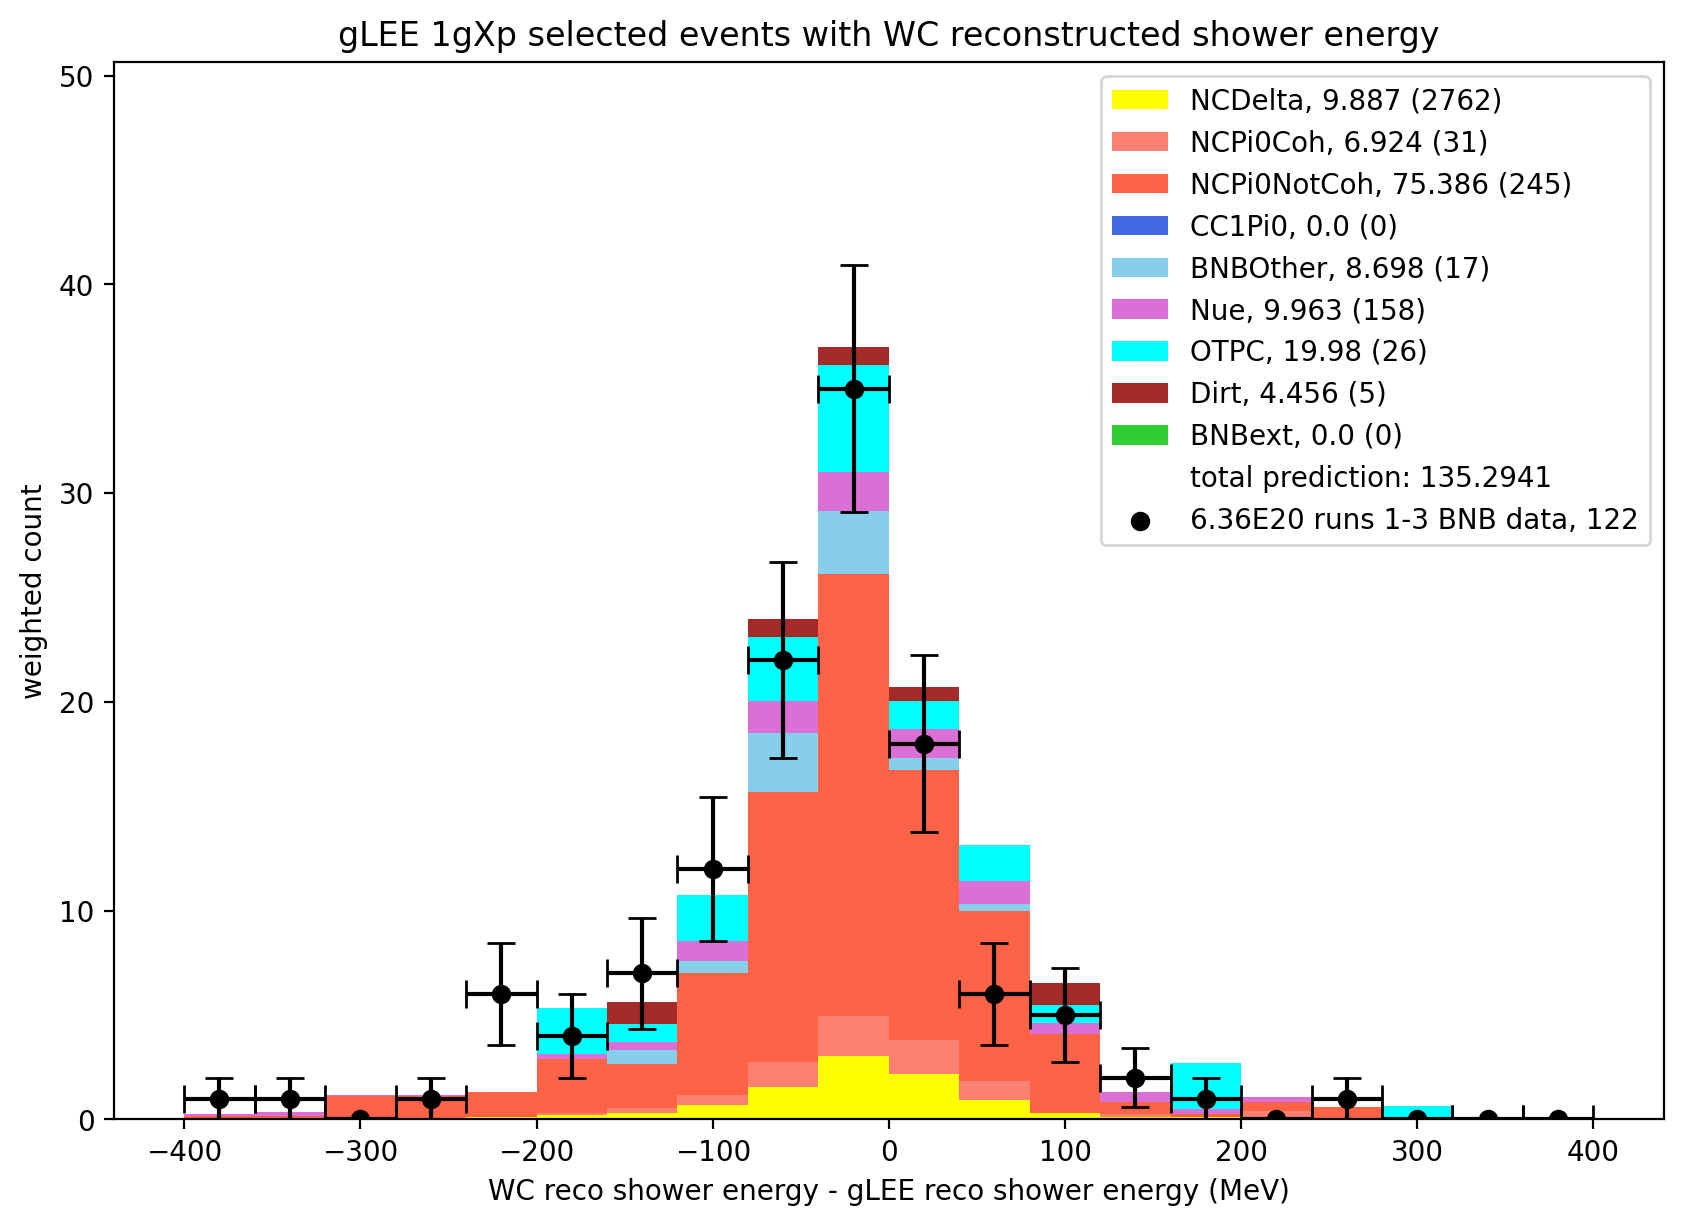

<Figure size 432x288 with 0 Axes>

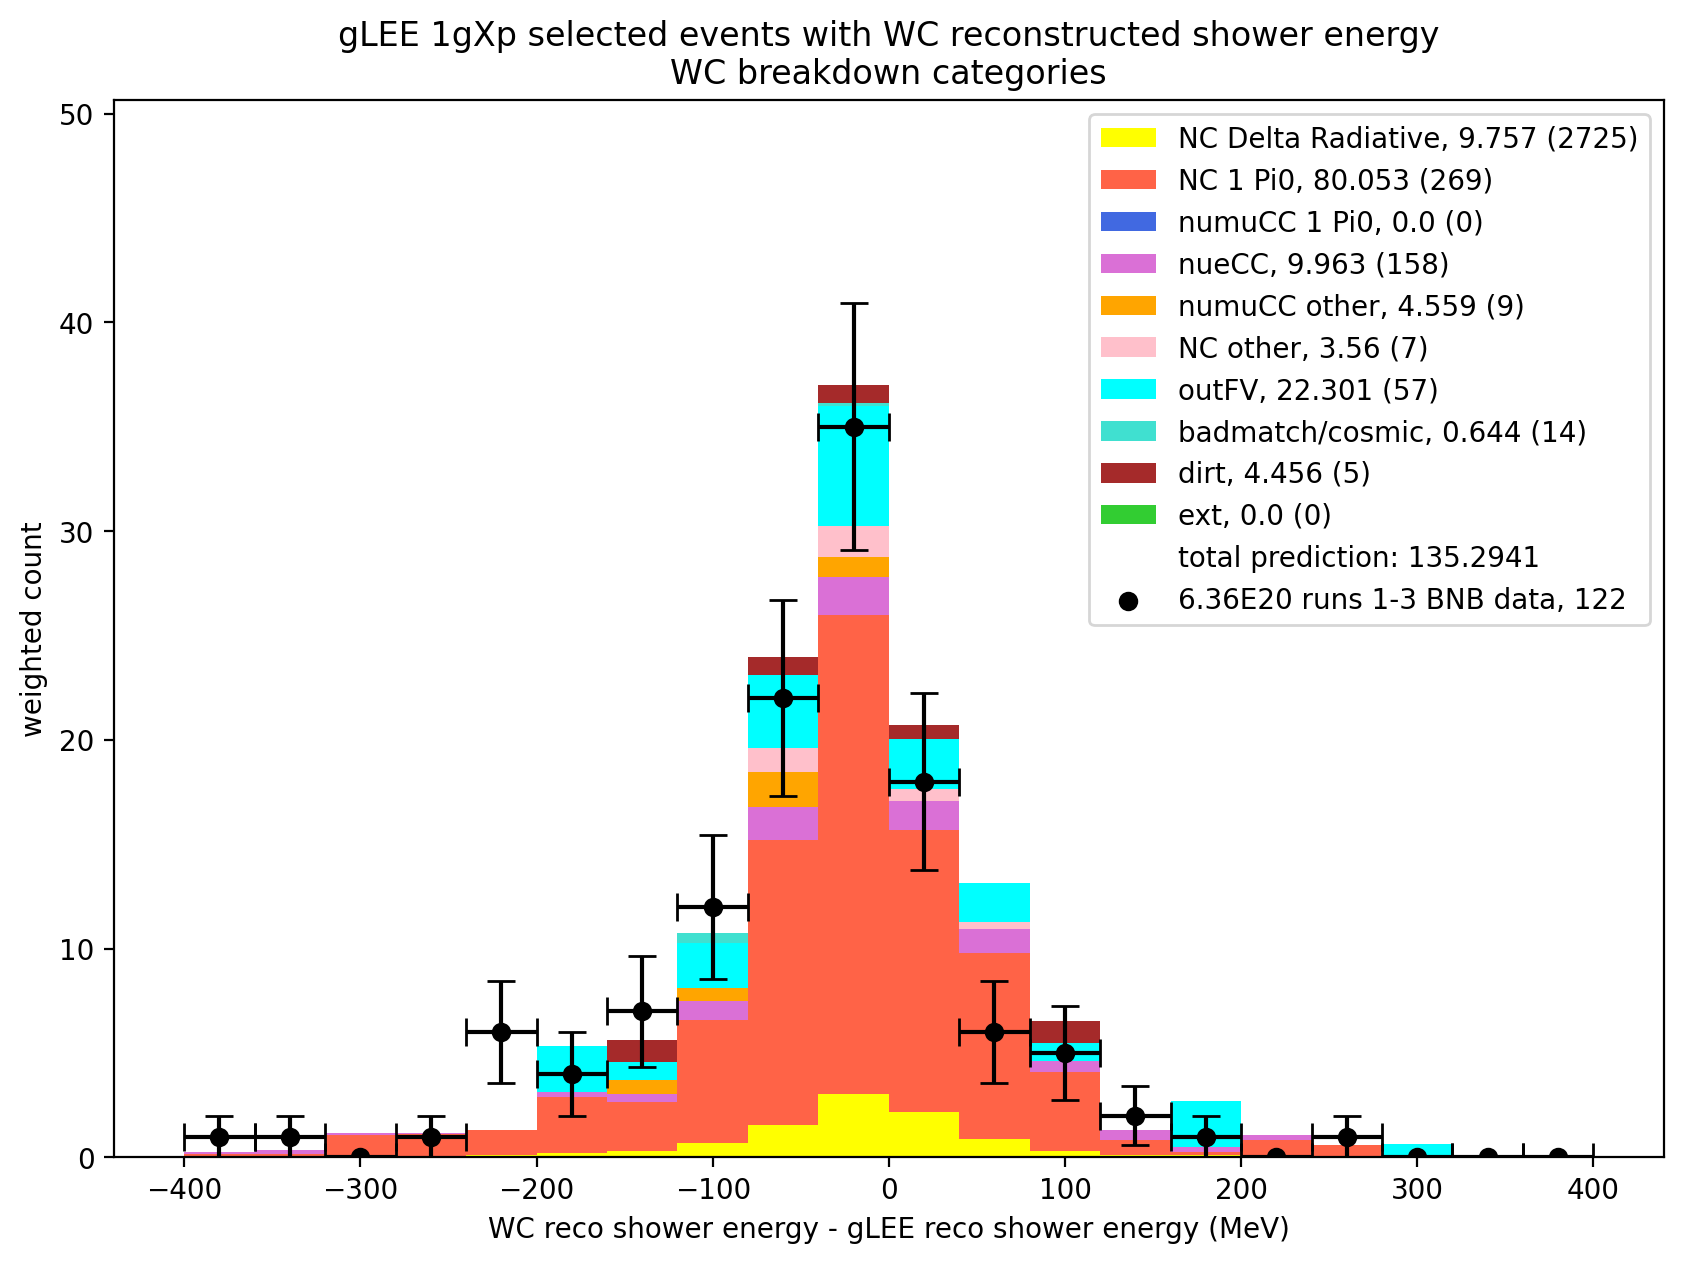

In [21]:
for breakdown_num in [0,1]:
    categories = [gLEE_categories, wc_categories][breakdown_num]
    queries = [gLEE_queries, wc_queries][breakdown_num]
    colors = [gLEE_colors, wc_colors][breakdown_num]

    # only including events in the gLEE files and where WC reconstructs a shower with positive energy
    gLEE_sel_selected_df = merged_glee_WC_comparison_df.query("reco_shower_energy_corrected == reco_shower_energy_corrected and reco_showerKE > 0")


    selected_e_categories = []
    selected_w_categories = []

    for q in queries:
        selected_e_categories.append(gLEE_sel_selected_df.query(f"{q}")["reco_showerKE"].to_numpy() - gLEE_sel_selected_df.query(f"{q}")["reco_shower_energy_corrected"].to_numpy())
        selected_w_categories.append(gLEE_sel_selected_df.query(f"{q}")["fixed_glee_pot_weight_corrected"].to_numpy())

    bin_edges = np.linspace(-400., 400., 21)

    bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2. for i in range(len(bin_edges) - 1)]
    num_bins = len(bin_edges) - 1



    hist_, bin_edges_ = np.histogram(gLEE_sel_selected_df.query("data_or_pred=='data'")["reco_showerKE"].to_numpy() 
                                     - gLEE_sel_selected_df.query("data_or_pred=='data'")["reco_shower_energy_corrected"].to_numpy(), 
                                     bins=bin_edges)

    data_points = hist_
    data_xerr = (bin_edges[1] - bin_edges[0]) / 2.
    data_yerr = [np.sqrt(x) for x in data_points]
    data_total = np.sum(data_points)

    plt.clf()
    plt.figure(dpi=200, figsize=(10,7))

    total_counts = []
    for i in range(len(selected_e_categories)):
        hist_, bin_edges_ = np.histogram(selected_e_categories[i], bins=1, range=(-1e6, 1e6), weights=selected_w_categories[i])
        total_counts.append(hist_[0])
    legend_strings = [categories[i] + ", " + str(np.round(total_counts[i], 3)) + " (" + str(len(selected_e_categories[i])) + ")" 
                      for i in range(len(categories))]

    plt.plot([], [], " ", label="total prediction: " + str(np.round(np.sum(total_counts), 4)))

    plt.hist(selected_e_categories, bins=bin_edges, weights=selected_w_categories, color=colors, label=legend_strings, stacked=True)

    total_pred_by_bin = n_[-1]

    plt.errorbar(bin_centers, data_points, yerr=data_yerr, xerr=data_xerr, fmt="none", capsize=5, c="black", zorder=10)
    plt.scatter(bin_centers, data_points, label=f"6.36E20 runs 1-3 BNB data, {data_total}", color="black", zorder=10)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [i + 1 for i in range(len(queries))] + [0, len(queries) + 1]
    #order = [1,2,3,4,5,6,7,8,9,10,11,0,12]
    L = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    L.set_zorder(20)

    plt.xlabel("WC reco shower energy - gLEE reco shower energy (MeV)")
    # (reco_showerKE - (1.21 * reco_shower_energy_plane2 + 9.88))

    plt.ylabel("weighted count")
    
    if breakdown_num == 0:
        plt.title(f"gLEE 1gXp selected events with WC reconstructed shower energy")
    else:
        plt.title(f"gLEE 1gXp selected events with WC reconstructed shower energy\nWC breakdown categories")


    plt.ylim(0, 1.2 * np.max(np.concatenate((total_pred_by_bin, data_points + data_yerr))))
    
    if breakdown_num == 0:
        plt.savefig(f"plots/reco_shower_energy_diff.png", facecolor="white")
    else:
        plt.savefig(f"plots/reco_shower_energy_diff_wc_breakdown.png", facecolor="white")

    plt.show()



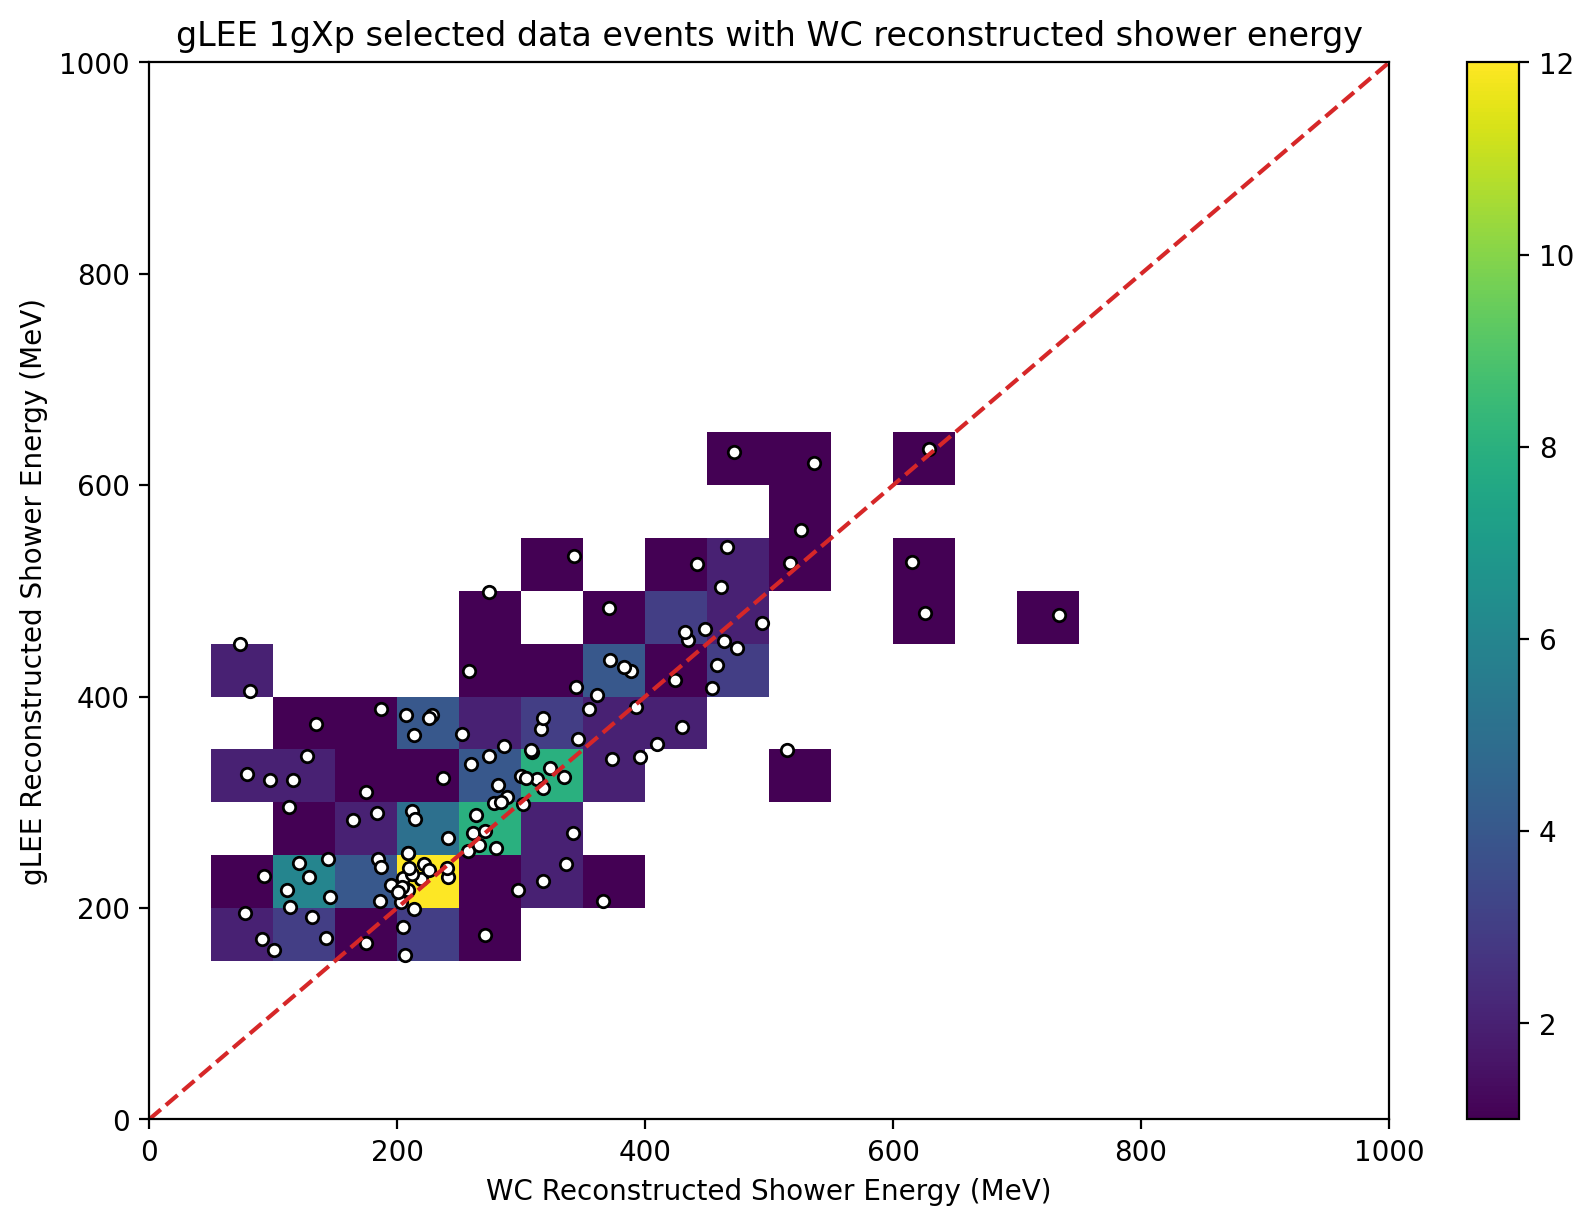

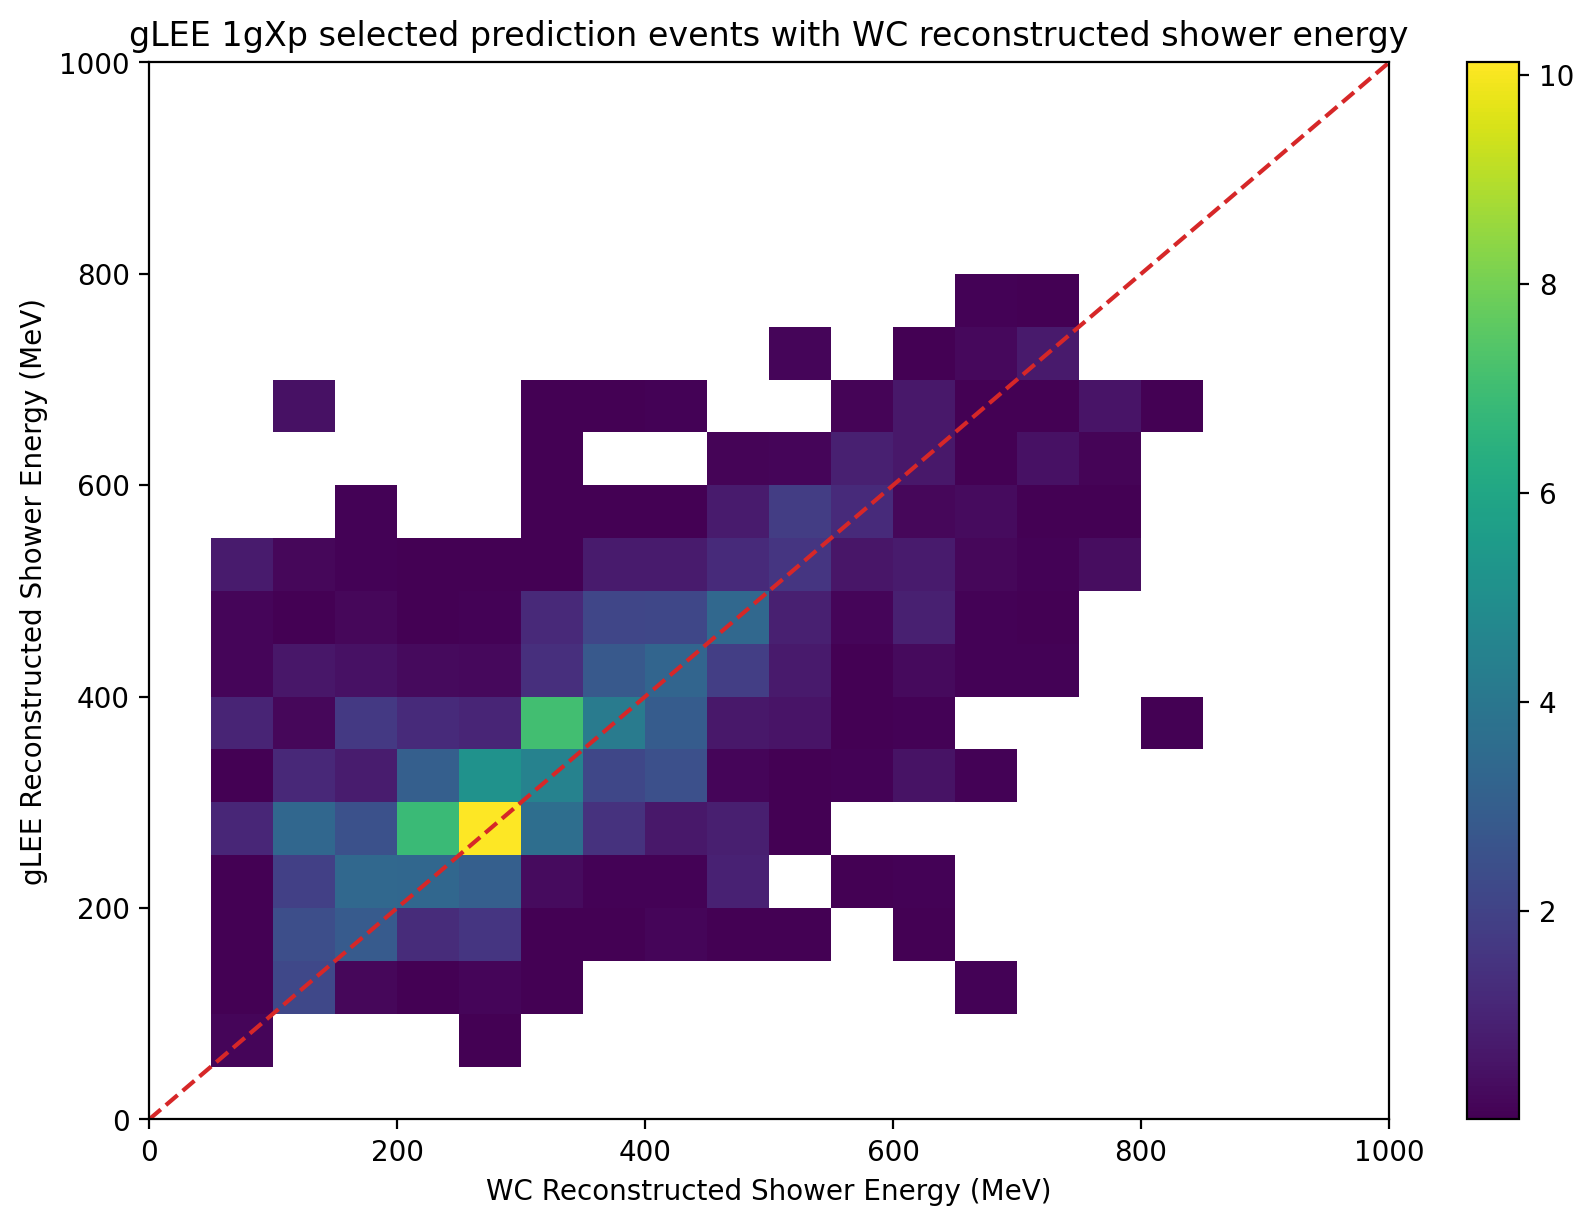

In [22]:
x_bin_edges = np.linspace(0., 1000., 21)
y_bin_edges = np.linspace(0., 1000., 21)
bins = (x_bin_edges, y_bin_edges)

plt.figure(dpi=200, figsize=(10,7))
ax = plt.gca()
plt.hist2d(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_showerKE"].to_numpy(), 
           gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(),
           bins=bins, cmin = 1e-10)
plt.colorbar()
plt.scatter(gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_showerKE"].to_numpy(), 
          gLEE_sel_selected_df.query("data_or_pred == 'data'")["reco_shower_energy_corrected"].to_numpy(), c="w", s=20, edgecolors='black')
plt.xlabel("WC Reconstructed Shower Energy (MeV)")
plt.ylabel("gLEE Reconstructed Shower Energy (MeV)")
plt.title("gLEE 1gXp selected data events with WC reconstructed shower energy")
plt.plot([0, x_bin_edges[-1]], [0, y_bin_edges[-1]], ls="--", c="tab:red")
#plt.title("1g0p0pi Selection Prediction")
#ax.xaxis.set_major_locator(MultipleLocator(500))
#ax.xaxis.set_major_formatter('{x:.0f}')
#ax.xaxis.set_minor_locator(MultipleLocator(50))
#ax.yaxis.set_major_locator(MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#plt.grid()
#plt.clim(10**-4, 10**3)
plt.savefig(f"plots/2d_shower_energy_comparison_data.png", facecolor="white")

plt.figure(dpi=200, figsize=(10,7))
ax = plt.gca()
plt.hist2d(gLEE_sel_selected_df.query("data_or_pred == 'pred'")["reco_showerKE"].to_numpy(), 
           gLEE_sel_selected_df.query("data_or_pred == 'pred'")["reco_shower_energy_corrected"].to_numpy(), 
           weights=gLEE_sel_selected_df.query("data_or_pred == 'pred'")["fixed_glee_pot_weight_corrected"].to_numpy(),
           bins=bins, cmin = 1e-10)
plt.xlabel("WC Reconstructed Shower Energy (MeV)")
plt.ylabel("gLEE Reconstructed Shower Energy (MeV)")
plt.title("gLEE 1gXp selected prediction events with WC reconstructed shower energy")
plt.colorbar()

plt.plot([0, x_bin_edges[-1]], [0, y_bin_edges[-1]], ls="--", c="tab:red")

#plt.title("1g0p0pi Selection Prediction")
#ax.xaxis.set_major_locator(MultipleLocator(500))
#ax.xaxis.set_major_formatter('{x:.0f}')
#ax.xaxis.set_minor_locator(MultipleLocator(50))
#ax.yaxis.set_major_locator(MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#plt.grid()
#plt.clim(10**-4, 10**3)
plt.savefig(f"plots/2d_shower_energy_comparison_pred.png", facecolor="white")
